In [1]:
EXPERIMENT_NOTEBOOK_PATH = "../../reports/experiments/2019-02-07_19-22_FULL_RUN/notebook.csv"


In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Load

In [3]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,mean_late_val_acc,epoch
0,0.131,2.277,0.241,2.172,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,1
1,0.205,2.155,0.221,2.076,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,2
2,0.230,2.075,0.319,1.983,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,3
3,0.280,1.981,0.323,1.929,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,4
4,0.317,1.901,0.296,2.017,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,5


## Preprocess

### correct name of reward

In [4]:
exp_df.rename(columns={"mean_late_val_acc":"reward"}, inplace=True)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,reward,epoch
0,0.131,2.277,0.241,2.172,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,1
1,0.205,2.155,0.221,2.076,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,2
2,0.230,2.075,0.319,1.983,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,3
3,0.280,1.981,0.323,1.929,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,4
4,0.317,1.901,0.296,2.017,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,5


### add epoch info and accuracy overfit

In [5]:
n_epochs = len(exp_df) / len(exp_df["trial_no"].unique()) / len(exp_df["sample_no"].unique())
exp_df["epoch"] = exp_df.index % n_epochs
exp_df["acc_overfit"] = exp_df["acc"] - exp_df["val_acc"]
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,reward,epoch,acc_overfit
0,0.131,2.277,0.241,2.172,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,0.0,-0.110
1,0.205,2.155,0.221,2.076,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,1.0,-0.016
2,0.230,2.075,0.319,1.983,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,2.0,-0.089
3,0.280,1.981,0.323,1.929,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,3.0,-0.043
4,0.317,1.901,0.296,2.017,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.448,4.0,0.021


## Some info

In [6]:
print (f"number of trials:{exp_df.trial_no.unique().__len__()}")
print (f"number of samples for each trial:{exp_df.sample_no.unique().__len__()}")

number of trials:301
number of samples for each trial:1


In [11]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure", '#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                 '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', 
                 '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                 '#000075', '#808080', '#ffffff', '#000000']*300

def plot_exp_lines(exp_df, plot=True):
    
    #plt.figure(figsize=(20,10))
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
    
    rowList = []
    for trial_no in exp_df["trial_no"].unique():
        
        if trial_no<1:
            continue
        
        iter_df = exp_df[exp_df["trial_no"]==trial_no].copy()
        
        exp_color = color_palette[trial_no]
        
        if exp_df[exp_df["trial_no"]==trial_no]["portion"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        if plot==True:
            ############################################################
            # Accuracy plot
            ############################################################
            for sample_id in iter_df["sample_no"].unique():
                sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
                xs = np.arange(1,51,1)
                axes[0].plot(xs, sample_df["val_acc"], color=exp_color, alpha=0.5, linewidth=2)
                axes[0].plot(xs, sample_df["acc"], '--',color=exp_color, alpha=0.5, linewidth=1)

            axes[0].set_title("validation (straight) and train (dashed) accuracies for child model\n"+\
                      "(each color represents a distinct augmentation strategy) ", fontsize=20)
            axes[0].set_ylabel("accuracy", fontsize=20)

            ############################################################
            # Loss plot
            ############################################################
            for sample_id in iter_df["sample_no"].unique():
                sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
                xs = np.arange(1,51,1)
                axes[1].plot(xs, sample_df["val_loss"], color=exp_color, alpha=0.5, linewidth=2)
                axes[1].plot(xs, sample_df["loss"], '--',color=exp_color, alpha=0.5, linewidth=1)

            #axes[1].title("validation (straight) and train (dashed) accuracies for child model\n"+\
            #          "(each color represents a distinct augmentation strategy) ", fontsize=20)
            axes[1].set_xlabel("epochs", fontsize=20)
            axes[1].set_ylabel("loss", fontsize=20)
            
        param1 = iter_df["aug1_type"].values[0]
        param2 = iter_df["aug1_magnitude"].values[0]
        param3 = iter_df["aug2_type"].values[0]
        param4 = iter_df["aug2_magnitude"].values[0]
        portion = iter_df["portion"].values[0]
        reward = iter_df["reward"].values[0]
        
        rowList.append([trial_no,param1,param2,param3,param4,portion,reward])
        
    ret_df = pd.DataFrame(rowList, columns=[
        "trial_no","aug1_type","aug1_magnitude", "aug2_type","aug2_magnitude","portion", "reward"]) 
    return ret_df.sort_values("reward", ascending=False)

Total number of trials: 301


,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
184,185,crop,0.057,gaussian-blur,0.811,0.407,0.570
153,154,horizontal-flip,0.864,gaussian-blur,0.881,0.452,0.565
189,190,invert,0.220,gaussian-blur,0.804,0.420,0.560
199,200,coarse-salt-pepper,0.065,gaussian-blur,0.869,0.393,0.555
79,80,add-to-hue-and-saturation,0.944,crop,0.149,0.491,0.555
98,99,horizontal-flip,0.231,gaussian-blur,0.947,0.339,0.552
21,22,shear,0.942,gaussian-blur,0.895,0.470,0.552
94,95,shear,0.453,gaussian-blur,0.907,0.343,0.551
170,171,shear,0.109,gaussian-blur,0.904,0.371,0.550
76,77,add-to-hue-and-saturation,0.941,add-to-hue-and-saturation,0.081,0.502,0.548


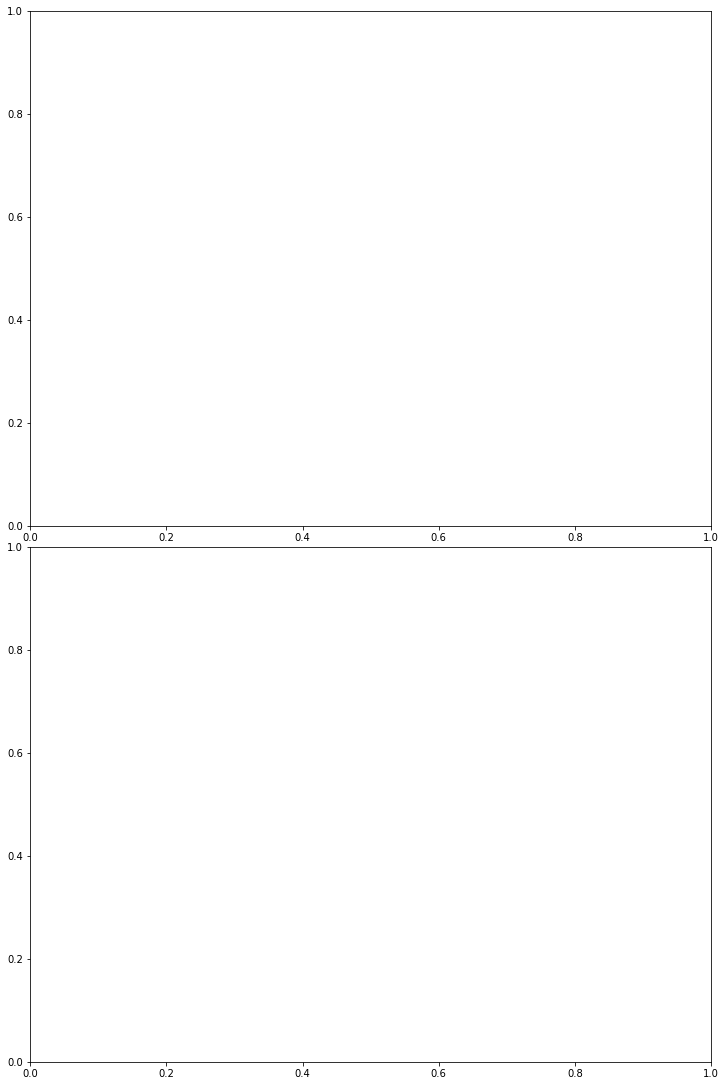

In [12]:
score_df = plot_exp_lines(exp_df, plot=False)
print (f"Total number of trials: {exp_df.trial_no.unique().__len__()}")
score_df[:10]

## Rewards trend

/Users/baris.ozmen/miniconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


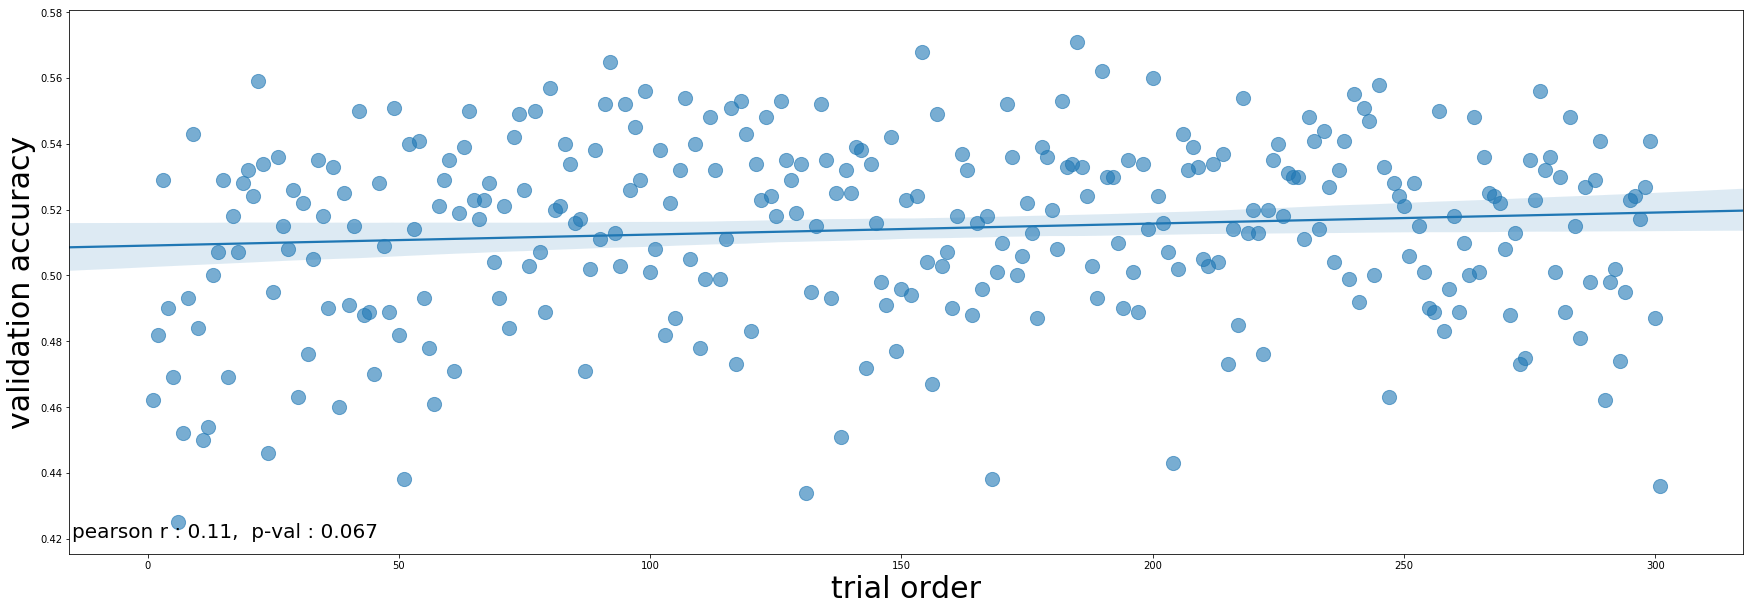

In [13]:
import seaborn as sns

df = (exp_df[exp_df["acc_overfit"]<0.05]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r : {r:.2},  p-val : {p:.2}", fontsize=20)

plt.xlabel("trial order", fontsize=30)
plt.ylabel("validation accuracy", fontsize=30)

del df

## How frequency of augmented images affect accuracy?

Text(0, 0.5, 'val_acc')

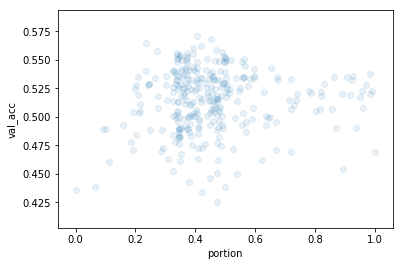

In [14]:
df = (exp_df[exp_df["acc_overfit"]<0.05]
         .sort_values("val_acc", ascending=False)
         .drop_duplicates(["trial_no","sample_no"])
     )[["portion","val_acc"]]

plt.scatter(df["portion"], df["val_acc"], alpha=0.1)
plt.xlabel("portion")
plt.ylabel("val_acc")

In [15]:
from scipy.stats import pearsonr

pearsonr(df["portion"], df["val_acc"])

(0.07202123249047267, 0.21278595064225353)

In [16]:
exp_df.drop_duplicates("trial_no")["portion"].unique().__len__()

225

# Top 5 policy accuracy curves (they're overfitting for augmentation)

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
2,185,crop,0.057,gaussian-blur,0.811,0.407,0.570
1,154,horizontal-flip,0.864,gaussian-blur,0.881,0.452,0.565
3,190,invert,0.220,gaussian-blur,0.804,0.420,0.560
0,80,add-to-hue-and-saturation,0.944,crop,0.149,0.491,0.555
4,200,coarse-salt-pepper,0.065,gaussian-blur,0.869,0.393,0.555


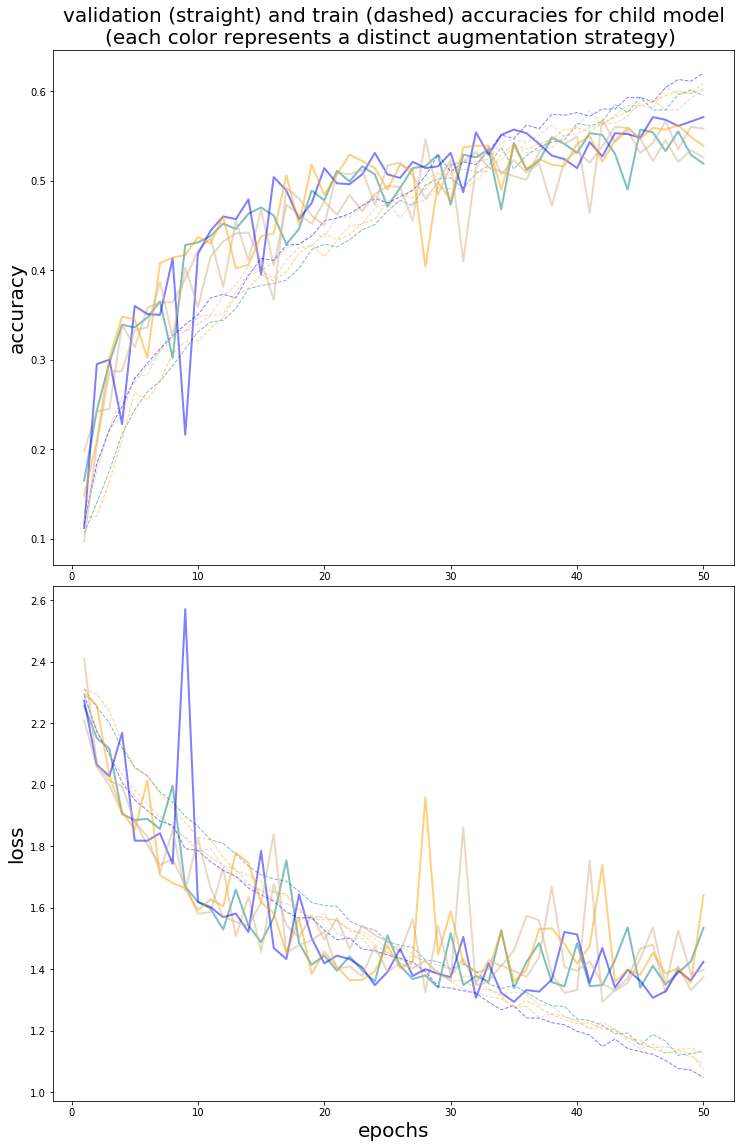

In [17]:
top_policy_trial_no_arr = score_df[:5].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(top_policy_trial_no_arr)])

# Bottom 5 policy accuracy curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
3,51,coarse-dropout,0.014,gaussian-blur,0.912,0.064,0.423
2,24,coarse-salt-pepper,0.870,gaussian-blur,0.090,0.451,0.422
0,4,brighten,0.368,vertical-flip,0.140,0.870,0.412
4,247,crop,0.059,gaussian-blur,0.520,0.410,0.407
1,6,gamma-contrast,0.537,clouds,0.106,0.474,0.401


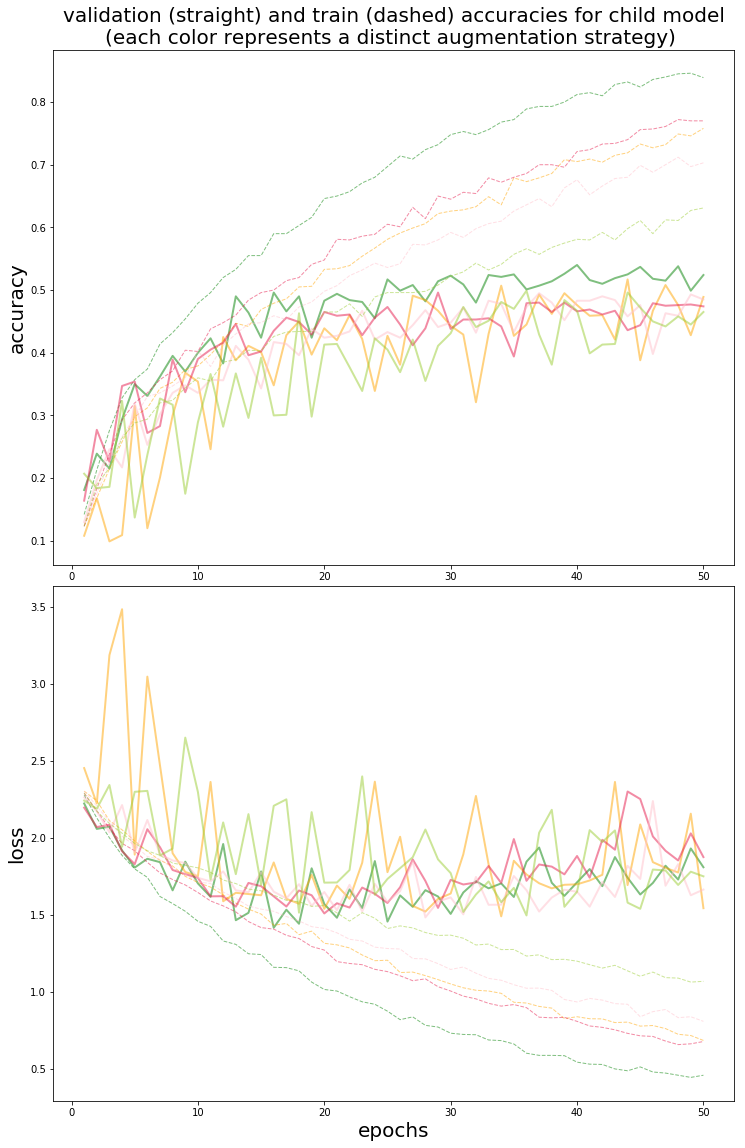

In [18]:
worst_policy_trial_no_arr = score_df[-5:].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(worst_policy_trial_no_arr)])

In [21]:
import sys
sys.path.insert(0,"../../")

from deepaugment.augmenter import Augmenter
augmenter=Augmenter()

In [26]:
from PIL import Image

from imgaug import augmenters as iaa

import sys
sys.path.insert(0,"../../")
from deepaugment.build_features import DataOp

Using TensorFlow backend.


In [27]:
data, input_shape = DataOp.load("cifar10",1000)
data = DataOp.preprocess(data)

Using 1000 training images


In [41]:
def display_images(X, nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        axes[int(i/ncols)][i%ncols].imshow(im_arr)
        
def display_images_comperatively(X,X_aug,nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%2==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug[i])

            
def display_augmentation_by_trial_no(trial_no, exp_df, data, nrows=2, ncols=4):
    trial_df = exp_df[exp_df["trial_no"]==trial_no]
    trial_hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                         trial_df.iloc[0,7],trial_df.iloc[0,8],
                         1.0] # proportion always 1

    aug_data = augmenter.run(data["X_train"], data["y_train"],*trial_hyperparams)

    print (trial_hyperparams)
    display_images_comperatively(data["X_train"], aug_data["X_train"], nrows, ncols)
    
def display_augmentation_by_steps(trial_no, df, data, nrows=4):
    from deepaugment.augmenter import transform
    trial_df = df[df["trial_no"]==trial_no]
    
    hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                   trial_df.iloc[0,7],trial_df.iloc[0,8],
                   1.0] # proportion always 1
    
    print ("hyperparams:",hyperparams)
    
    X = data["X_train"]
    X_aug_1 = transform(hyperparams[0], hyperparams[1], X)
    X_aug_2 = transform(hyperparams[2], hyperparams[3], X_aug_1)
    
    ncols=4
    fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(ncols*10,nrows*10))
    fig.tight_layout()
    fig.suptitle("smt")
    
    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%4==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug_1[i])
            axes[int((i+2)/ncols)][(i+2)%ncols].imshow(X_aug_2[i])
    


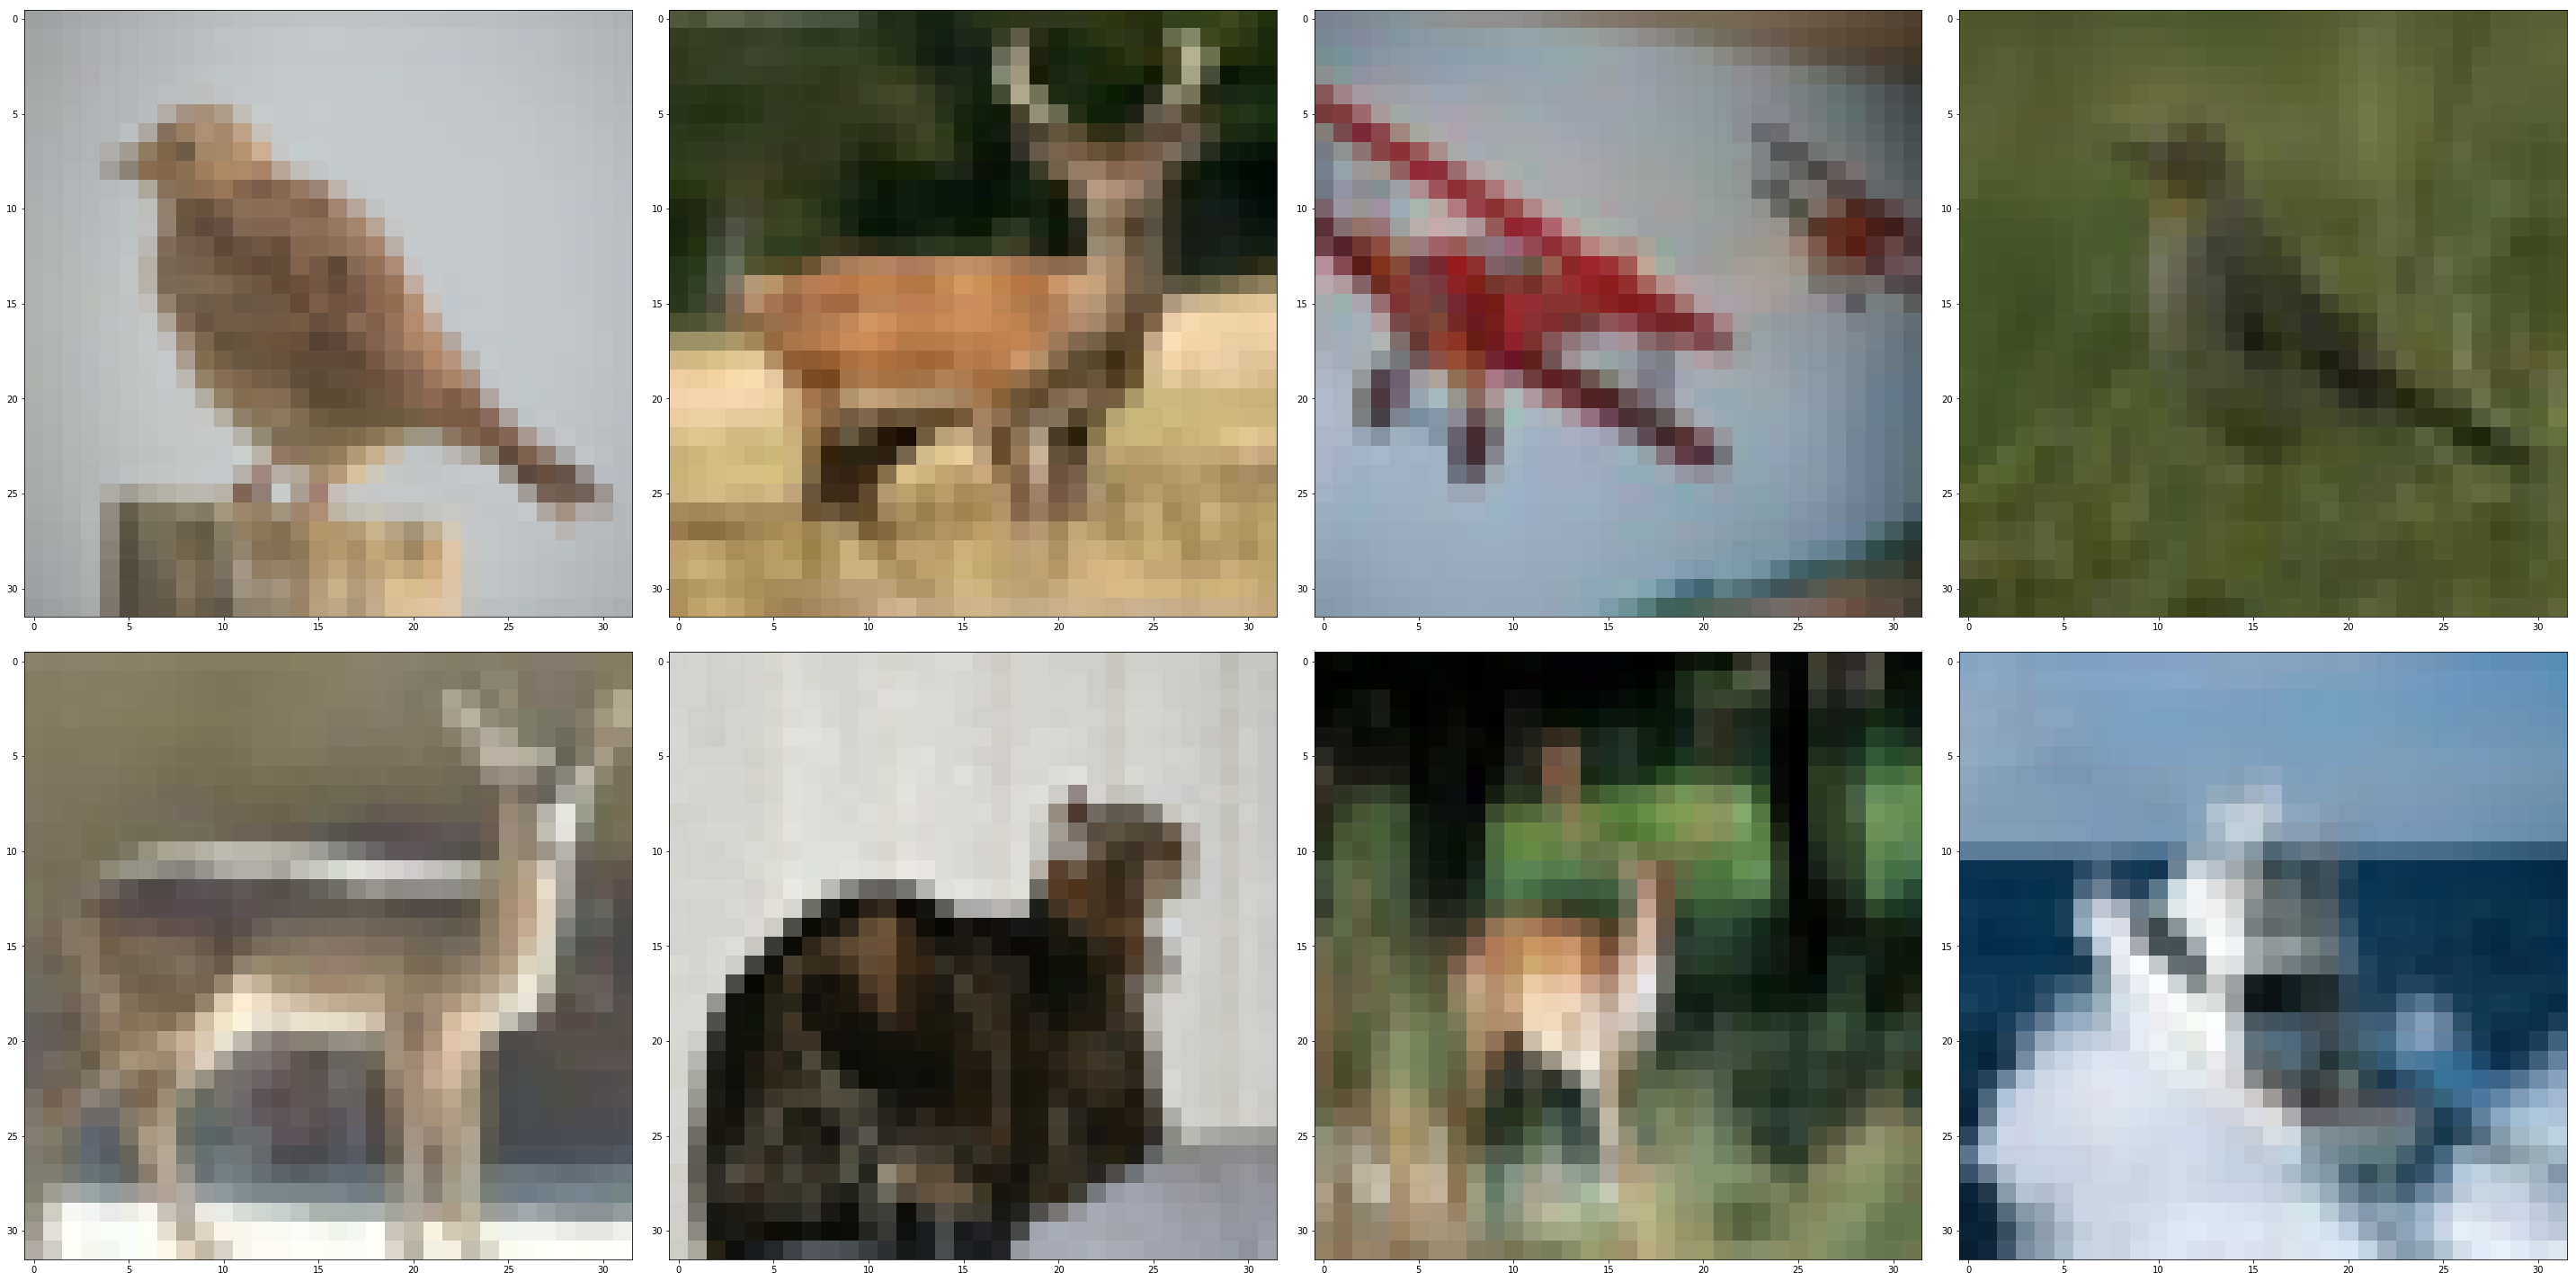

In [29]:
display_images(data["X_train"])

X_portion_aug.shape ->  (1000, 32, 32, 3)
['dropout', 0.8009999999999999, 'coarse-dropout', 0.679, 1.0]


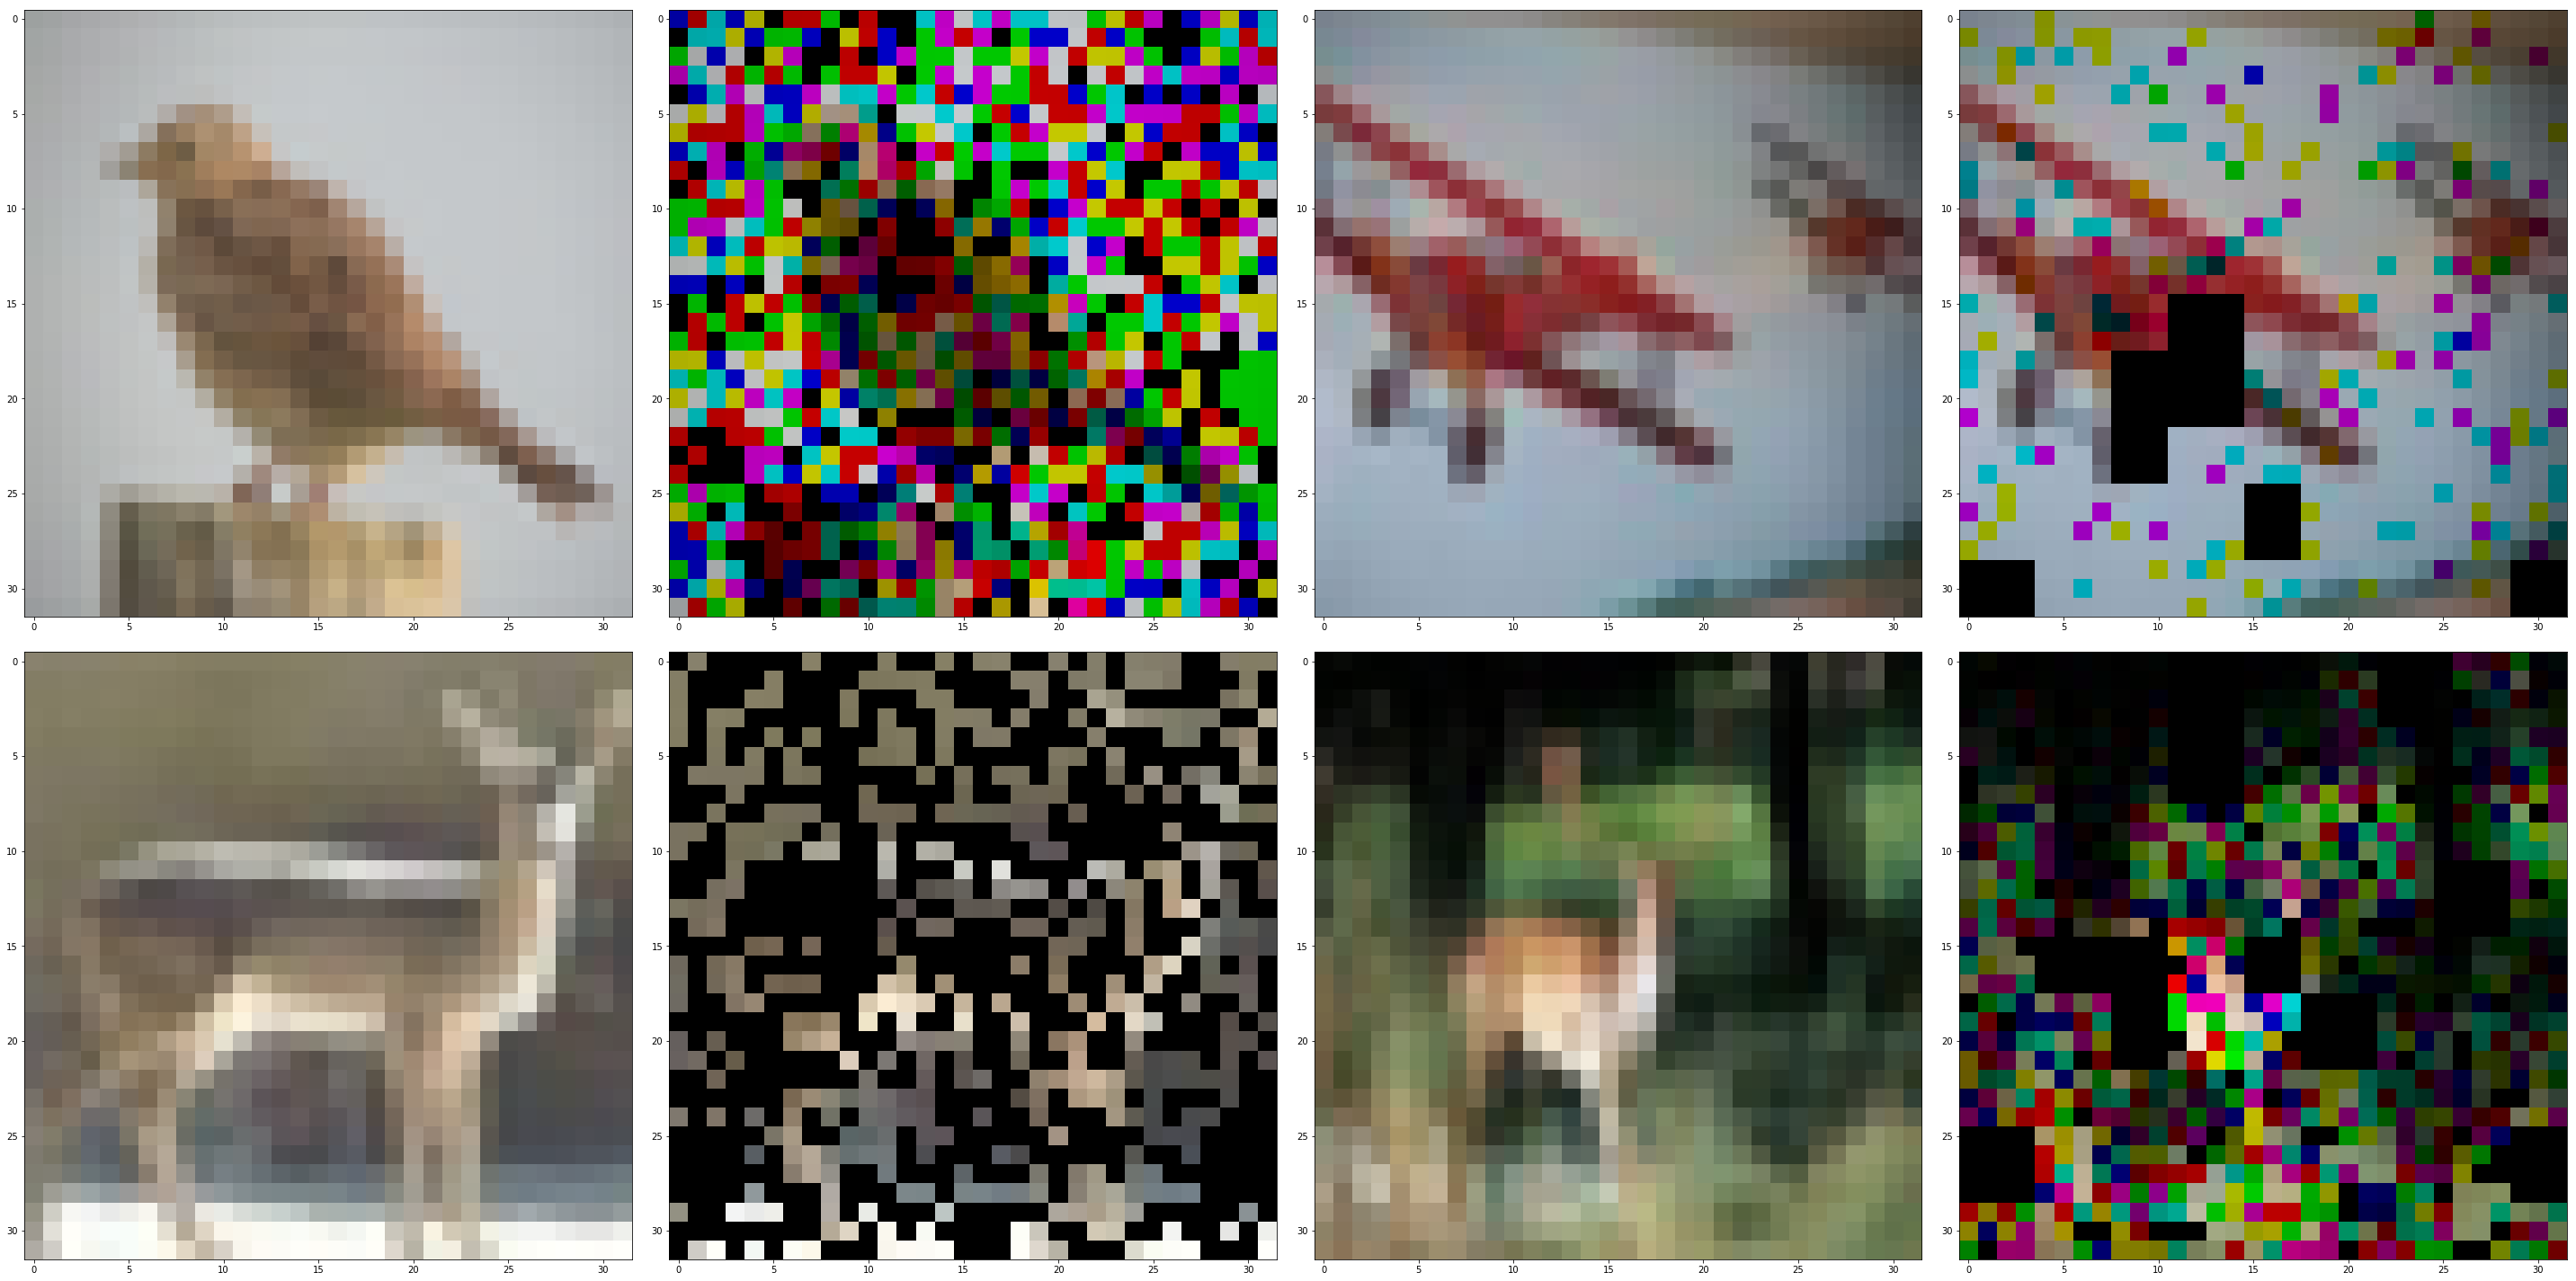

In [30]:
display_augmentation_by_trial_no(5, exp_df, data)

# Overfitting augmentations

185
X_portion_aug.shape ->  (1000, 32, 32, 3)
['crop', 0.057, 'gaussian-blur', 0.8109999999999999, 1.0]
154
X_portion_aug.shape ->  (1000, 32, 32, 3)
['horizontal-flip', 0.8640000000000001, 'gaussian-blur', 0.8809999999999999, 1.0]
190
X_portion_aug.shape ->  (1000, 32, 32, 3)
['invert', 0.22, 'gaussian-blur', 0.804, 1.0]
200
X_portion_aug.shape ->  (1000, 32, 32, 3)
['coarse-salt-pepper', 0.065, 'gaussian-blur', 0.8690000000000001, 1.0]
80
X_portion_aug.shape ->  (1000, 32, 32, 3)
['add-to-hue-and-saturation', 0.9440000000000001, 'crop', 0.149, 1.0]


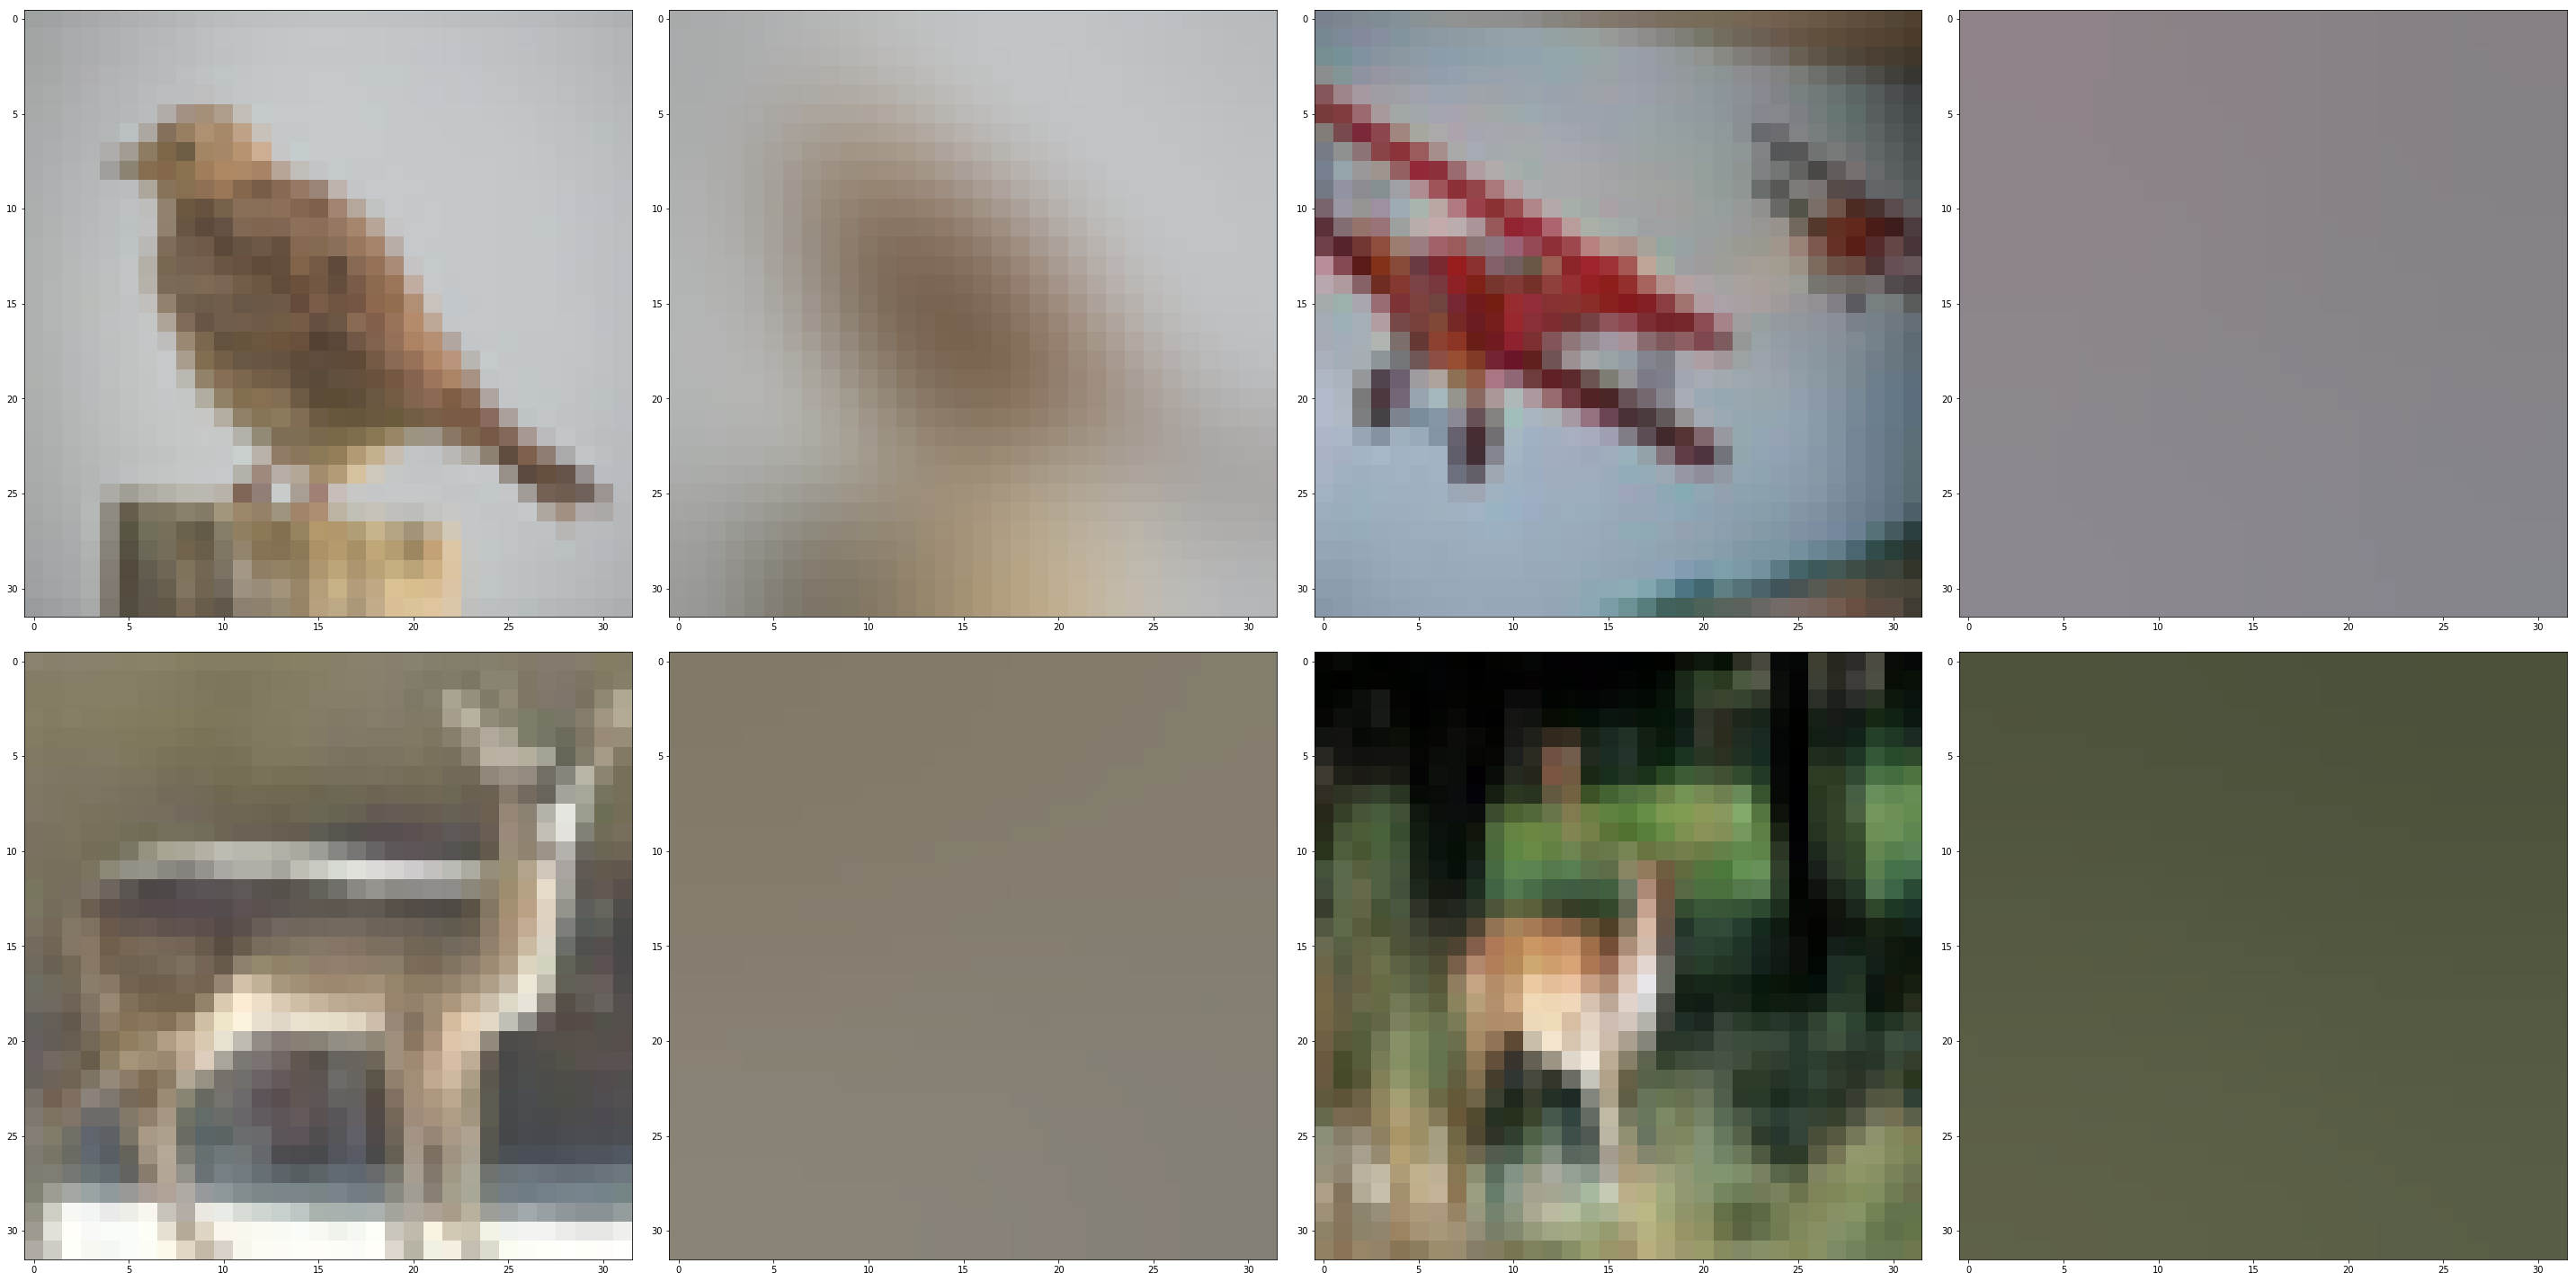

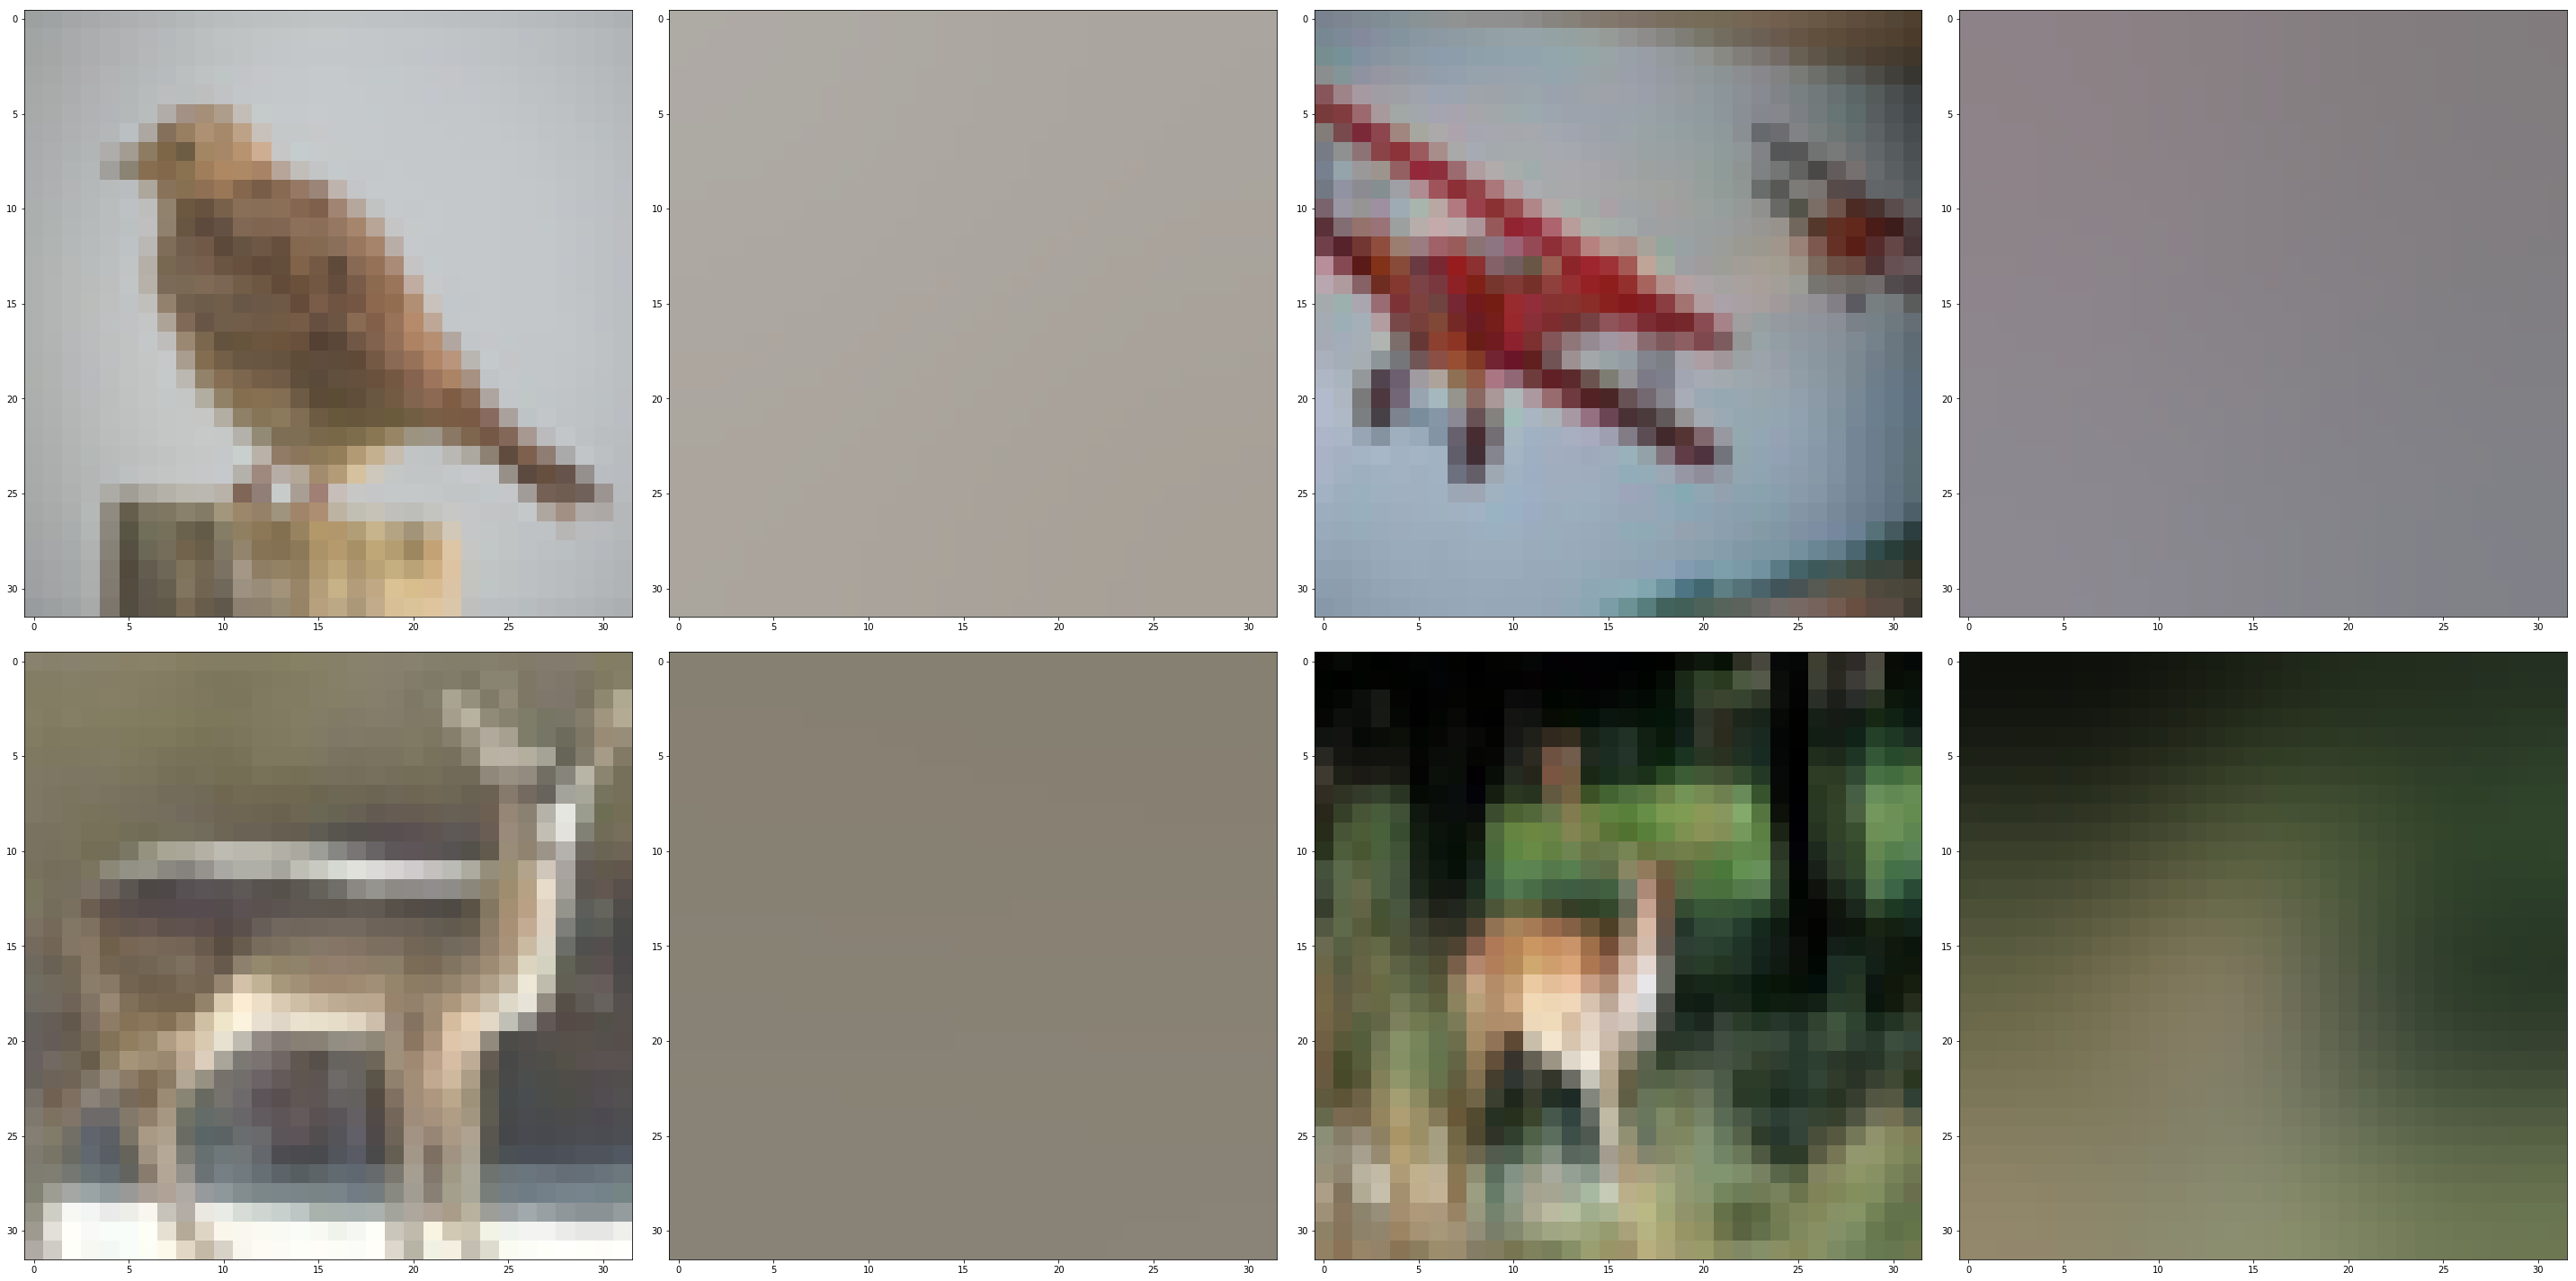

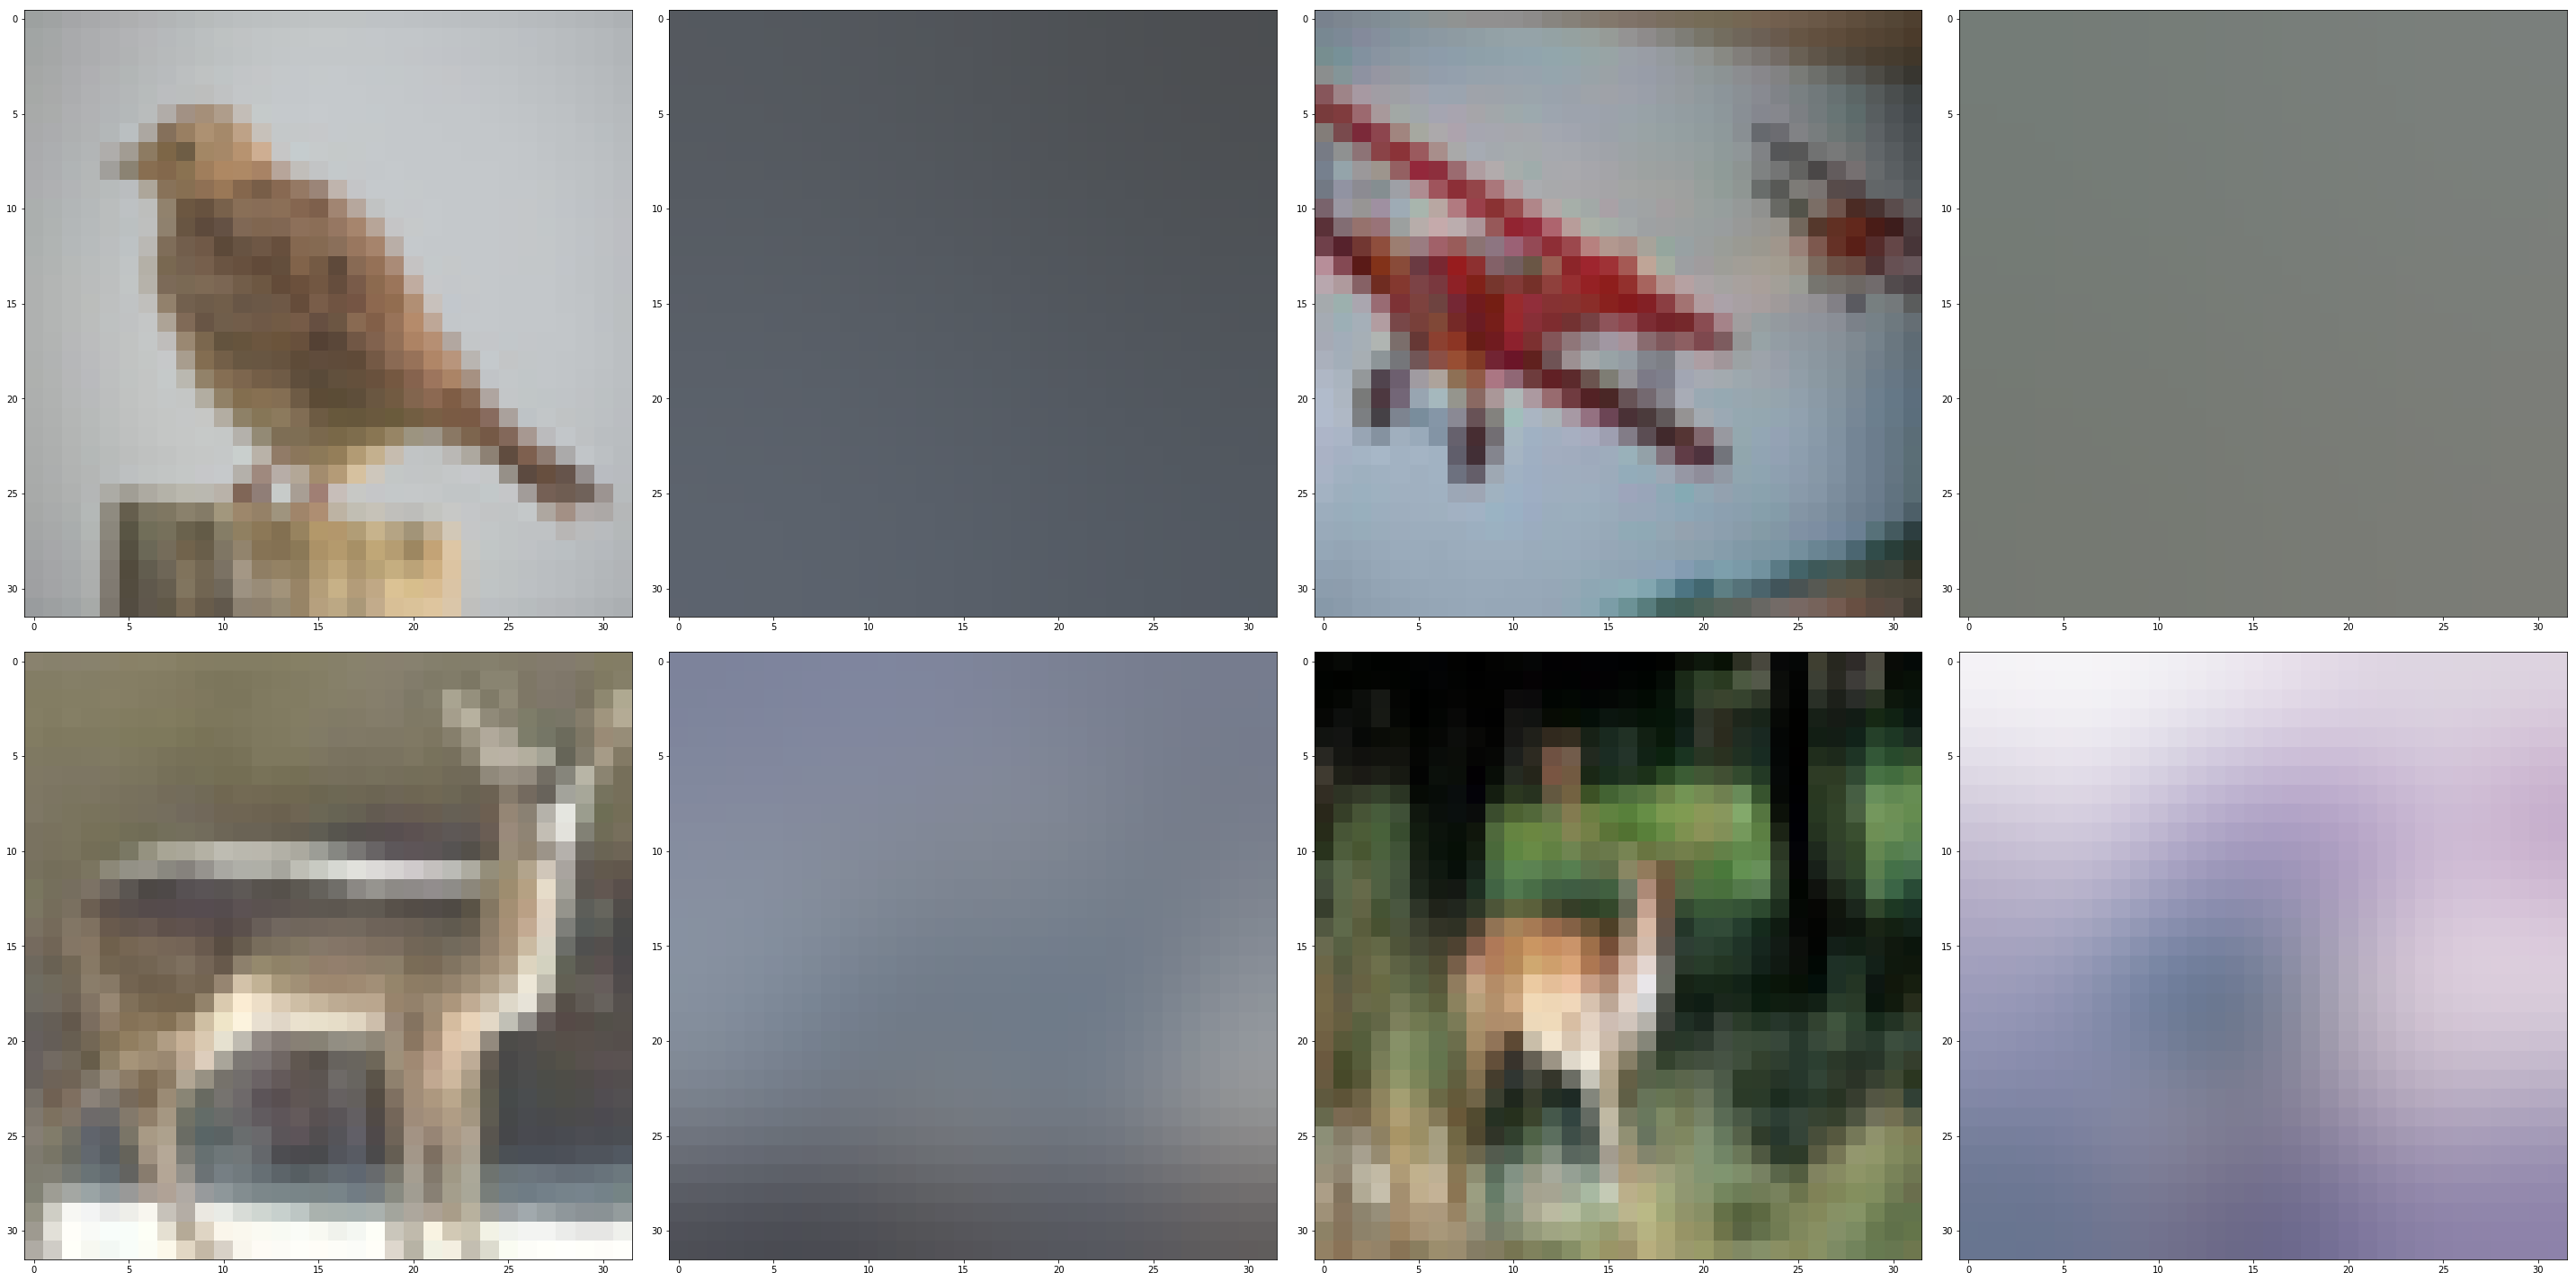

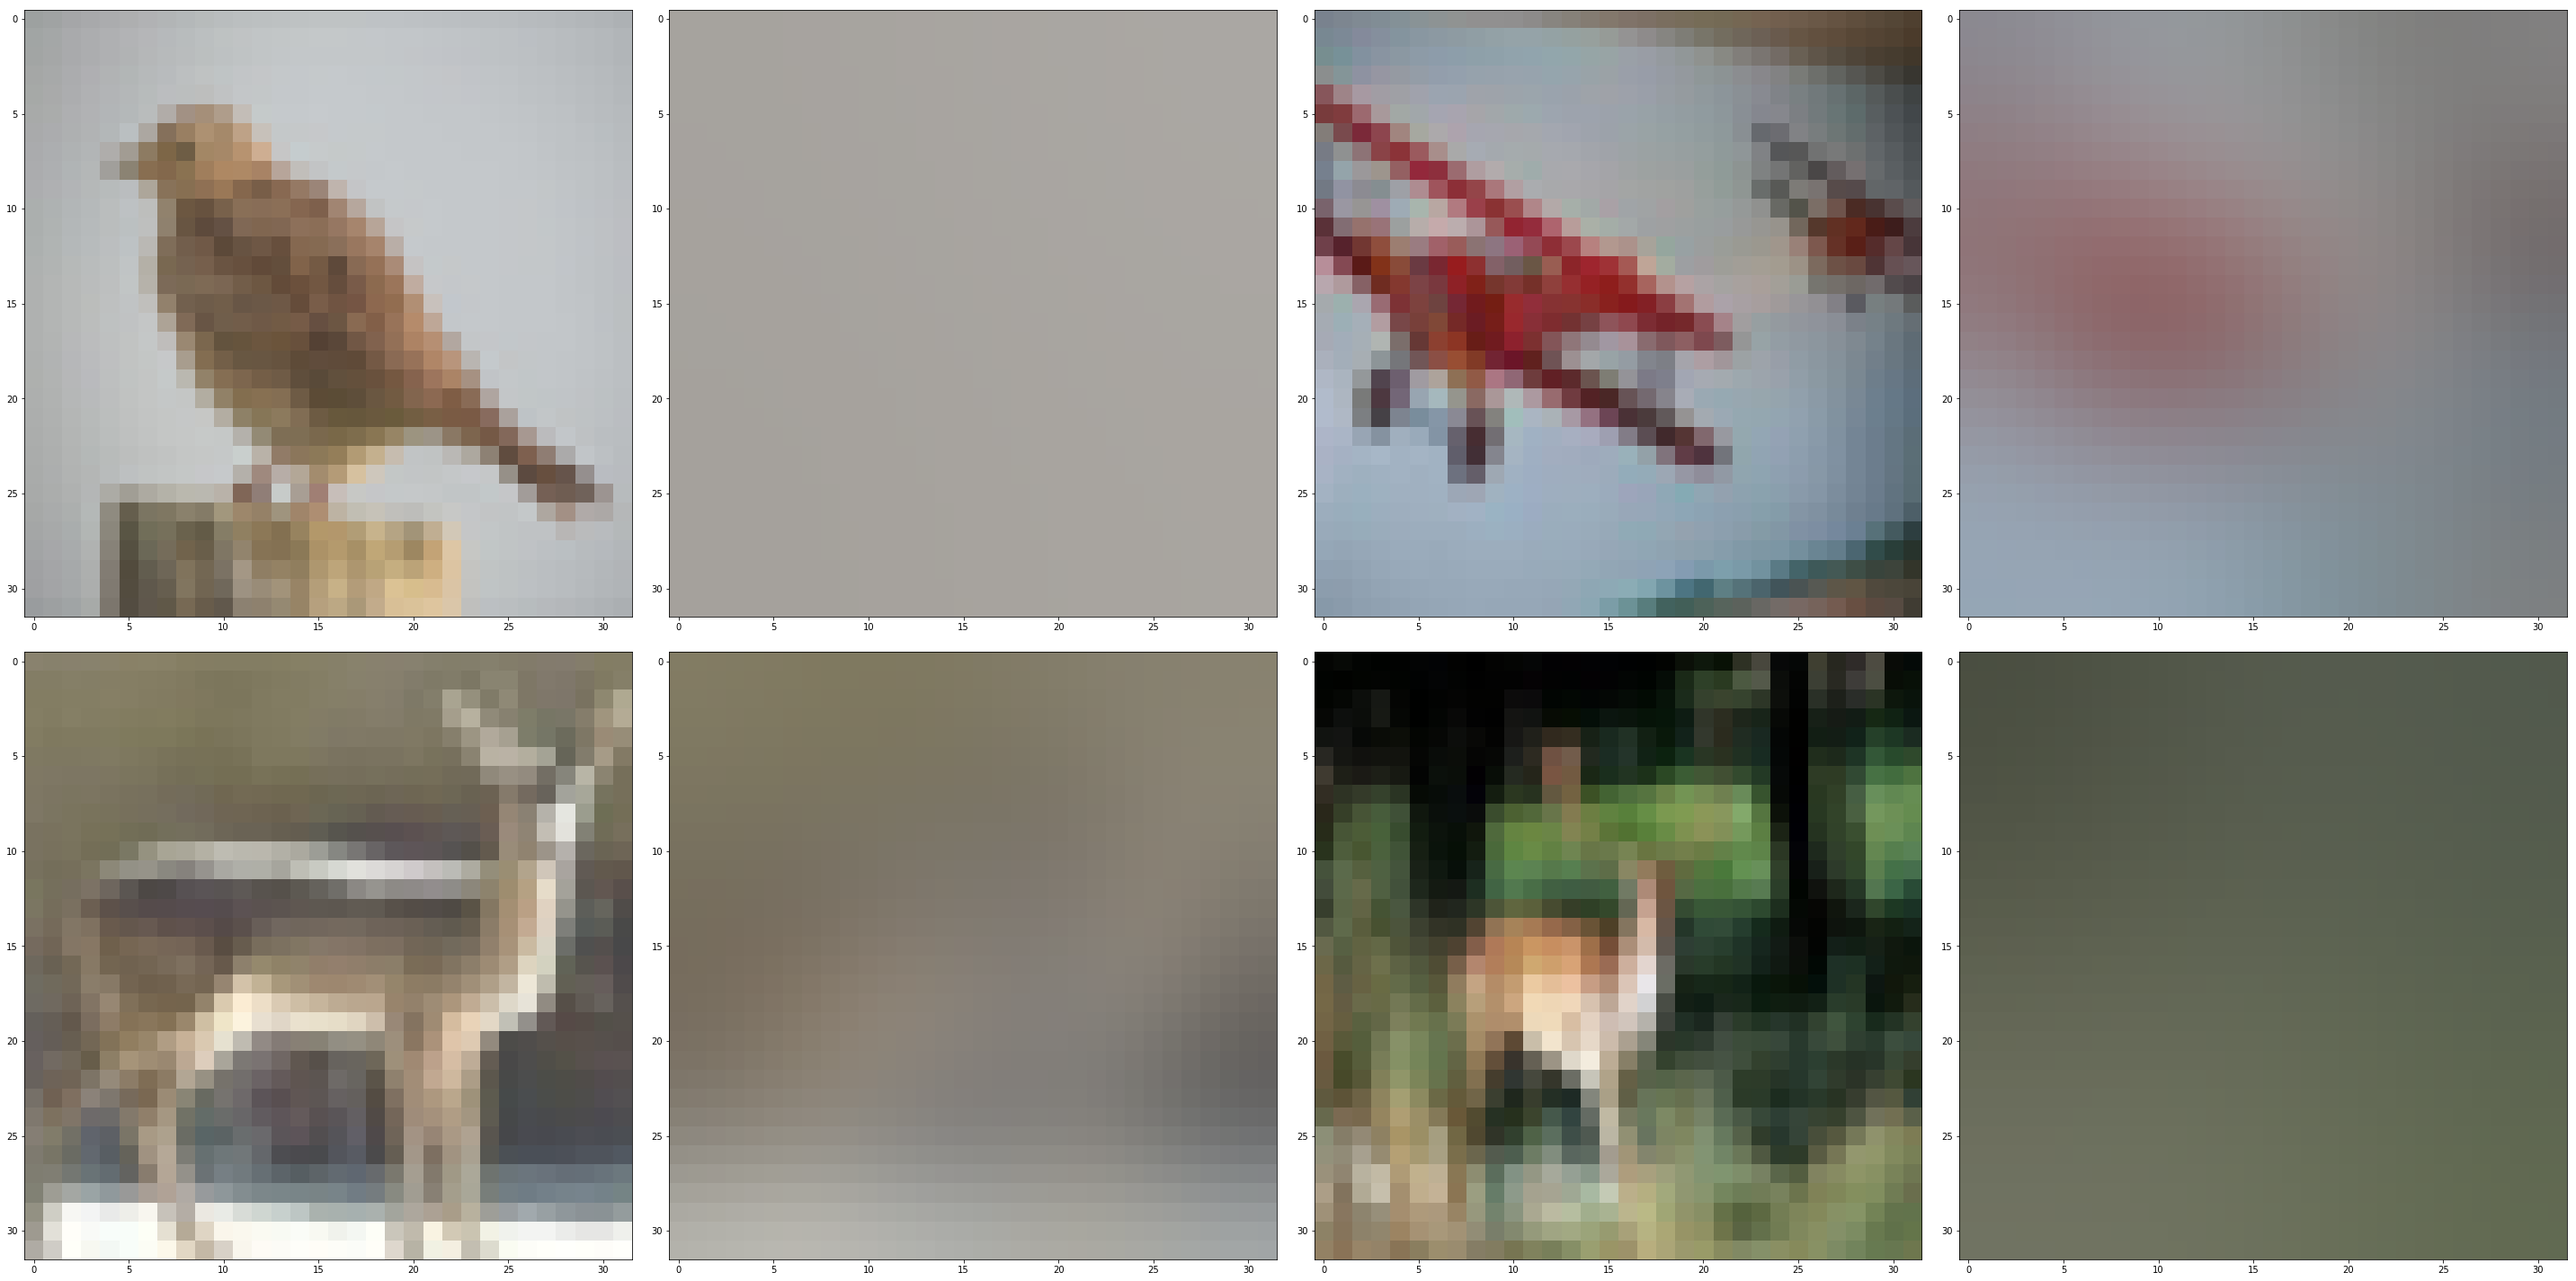

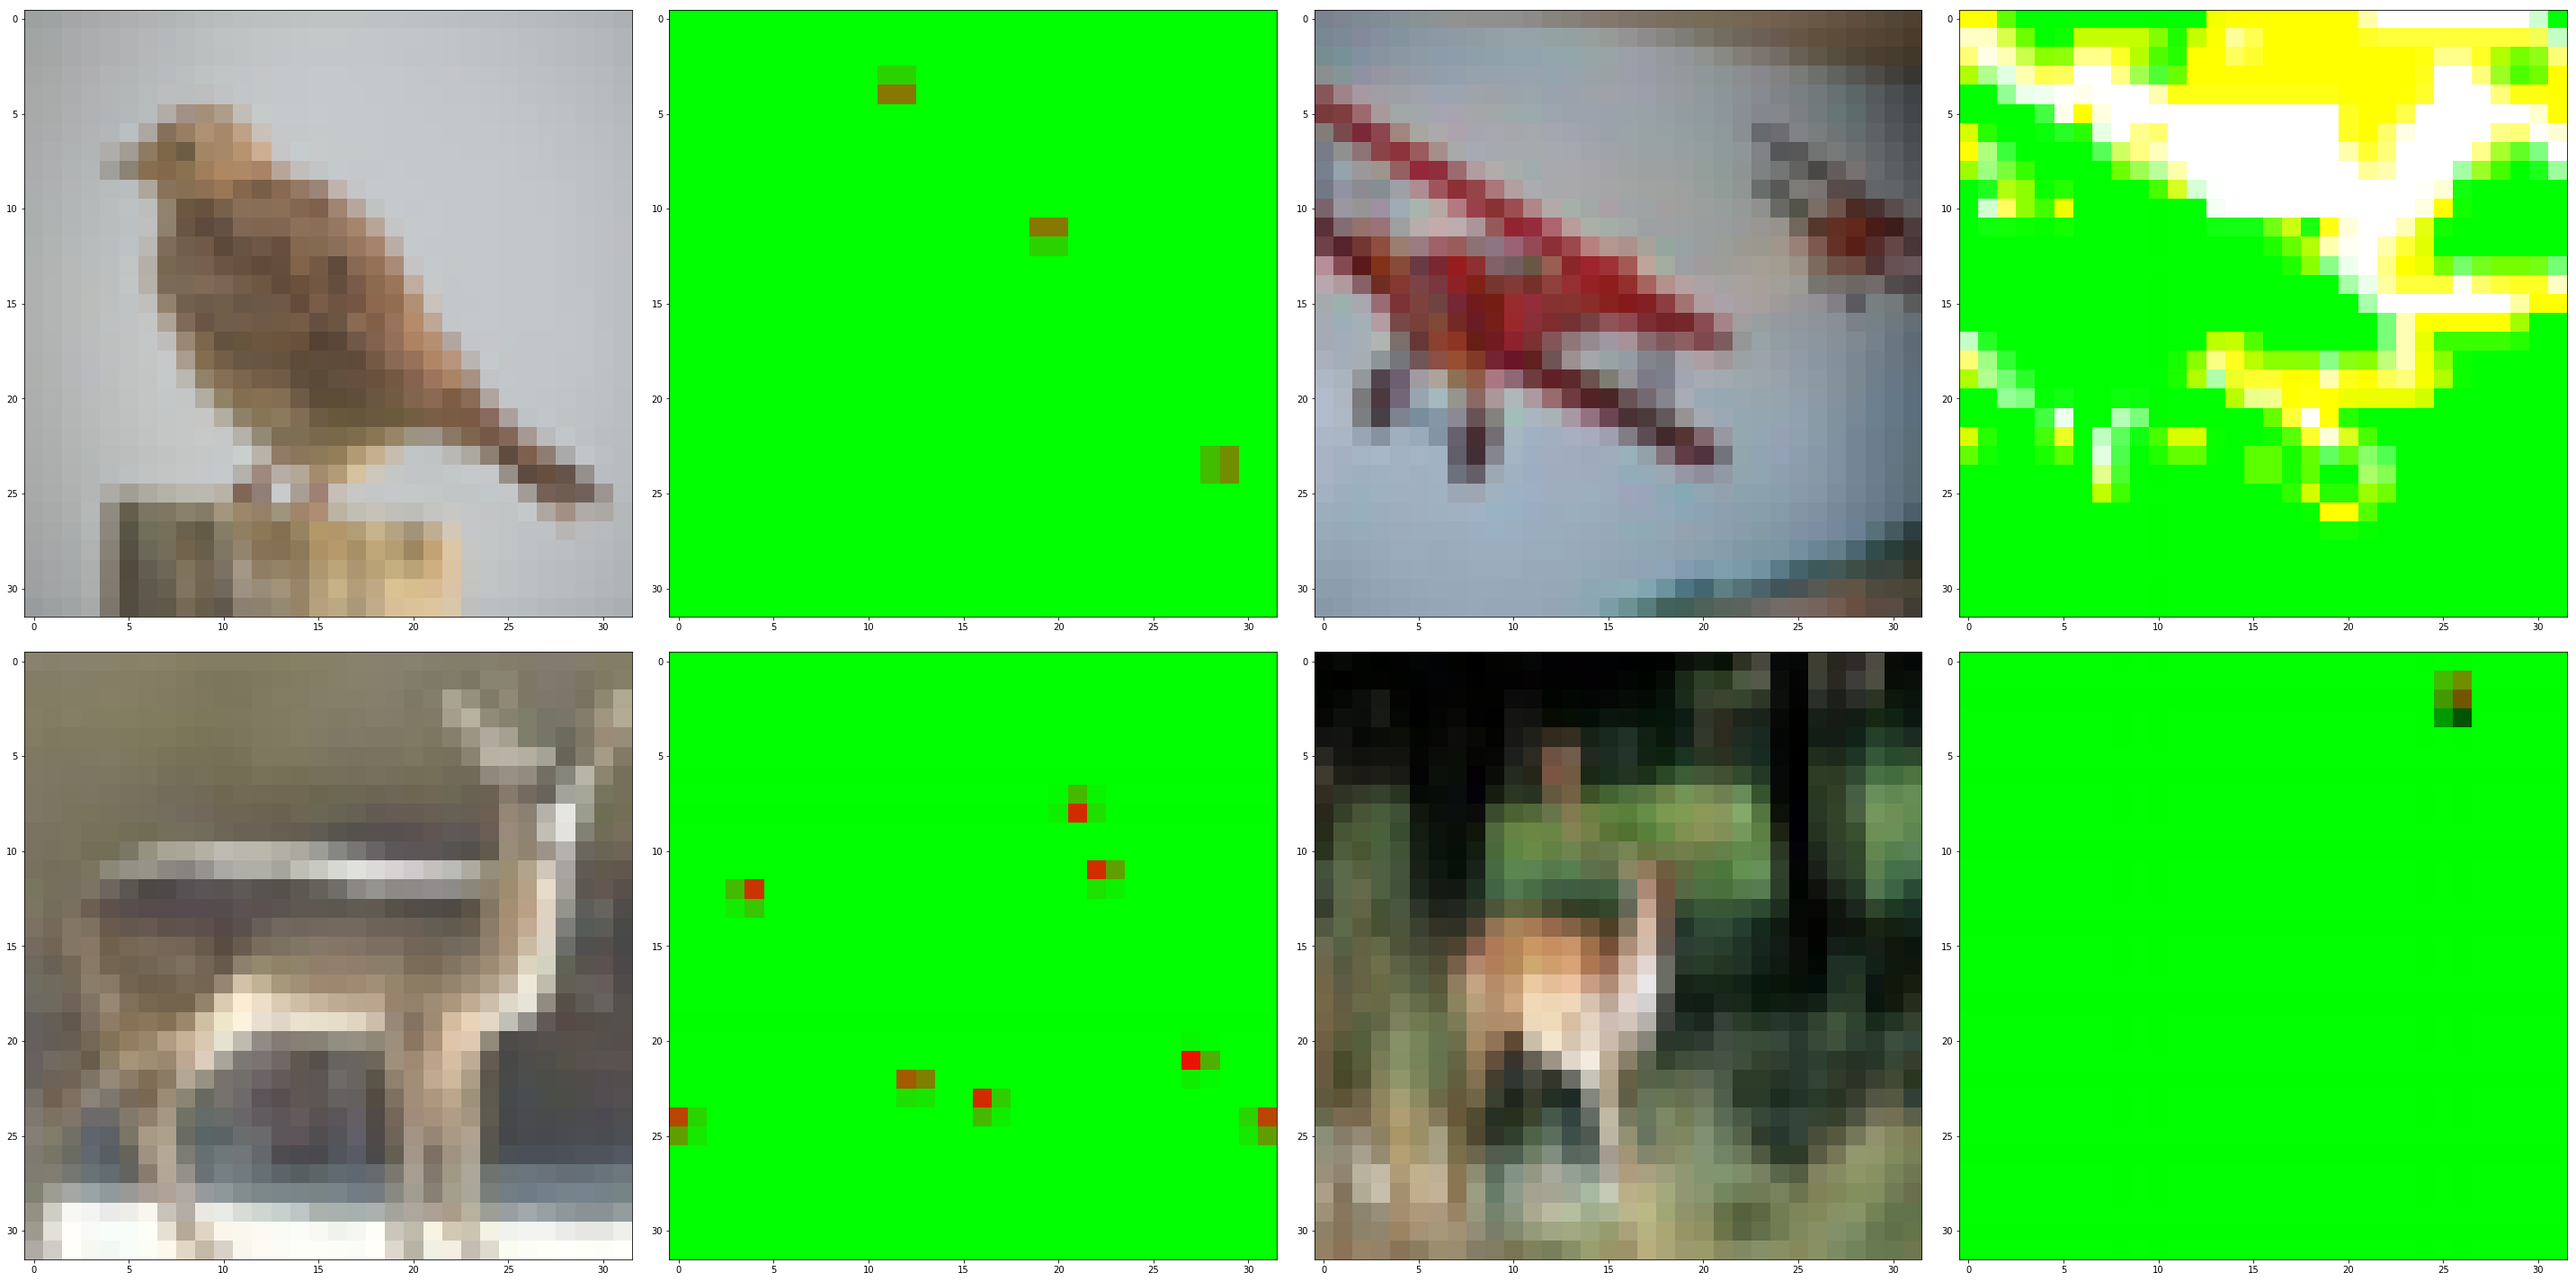

In [31]:
for i in top_policy_trial_no_arr:
    print (i)
    display_augmentation_by_trial_no(i, exp_df, data)

# Non-overfitting augmentations

In [35]:
acc_overfit_by_trial = exp_df[exp_df["epoch"]<20].groupby("trial_no").sum()["acc_overfit"]

# if acc_overfit is negative, that means validation is more accurate than training, so augmentation overfits
modified_exp_df = pd.merge(
    exp_df, 
    pd.DataFrame(acc_overfit_by_trial).reset_index().rename(columns={"acc_overfit":"total_acc_overfit"}),
    on="trial_no",
    how="left"
)

non_overfitting_exp_df = modified_exp_df[modified_exp_df["total_acc_overfit"]>0]

trial_no: 46
hyperparams: ['gaussian-blur', 0.992, 'gaussian-blur', 0.895, 1.0]
trial_no: 137
hyperparams: ['fog', 0.081, 'gaussian-blur', 0.907, 1.0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


trial_no: 27
hyperparams: ['vertical-flip', 0.968, 'gaussian-blur', 0.8220000000000001, 1.0]
trial_no: 165
hyperparams: ['horizontal-flip', 0.025, 'gaussian-blur', 0.904, 1.0]
trial_no: 267
hyperparams: ['dropout', 0.10300000000000001, 'gaussian-blur', 0.8109999999999999, 1.0]


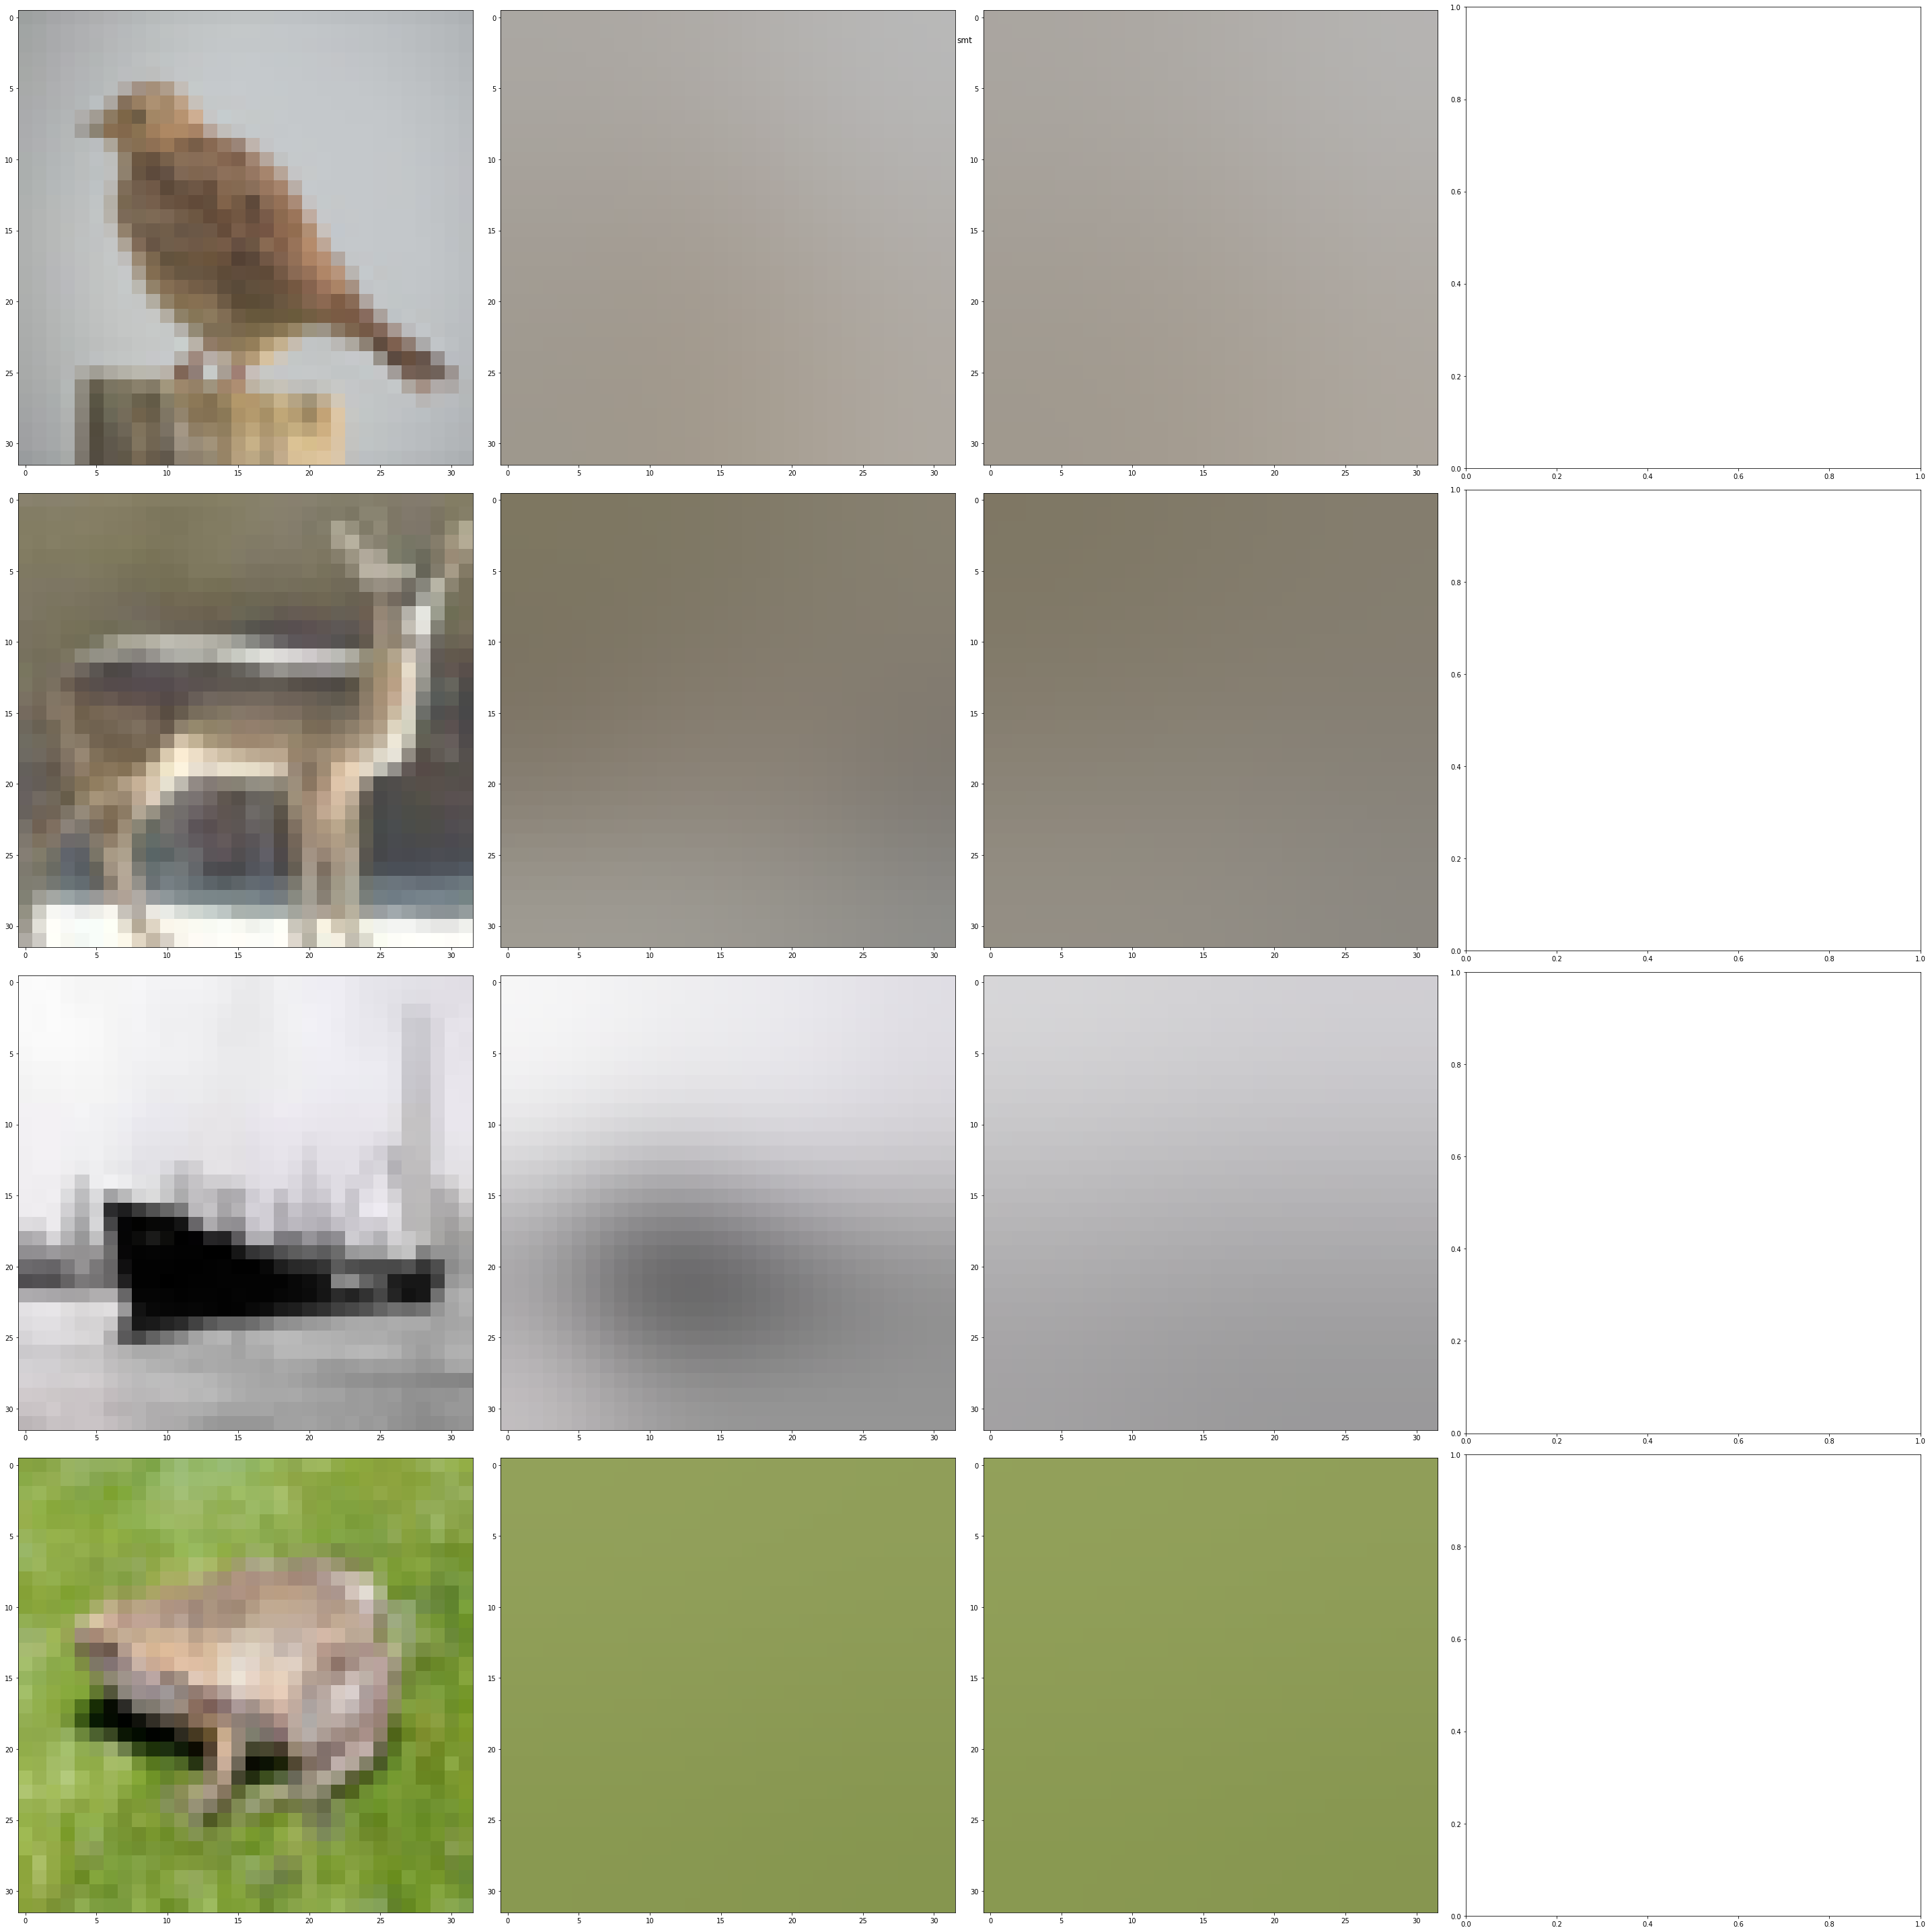

<Figure size 144x144 with 0 Axes>

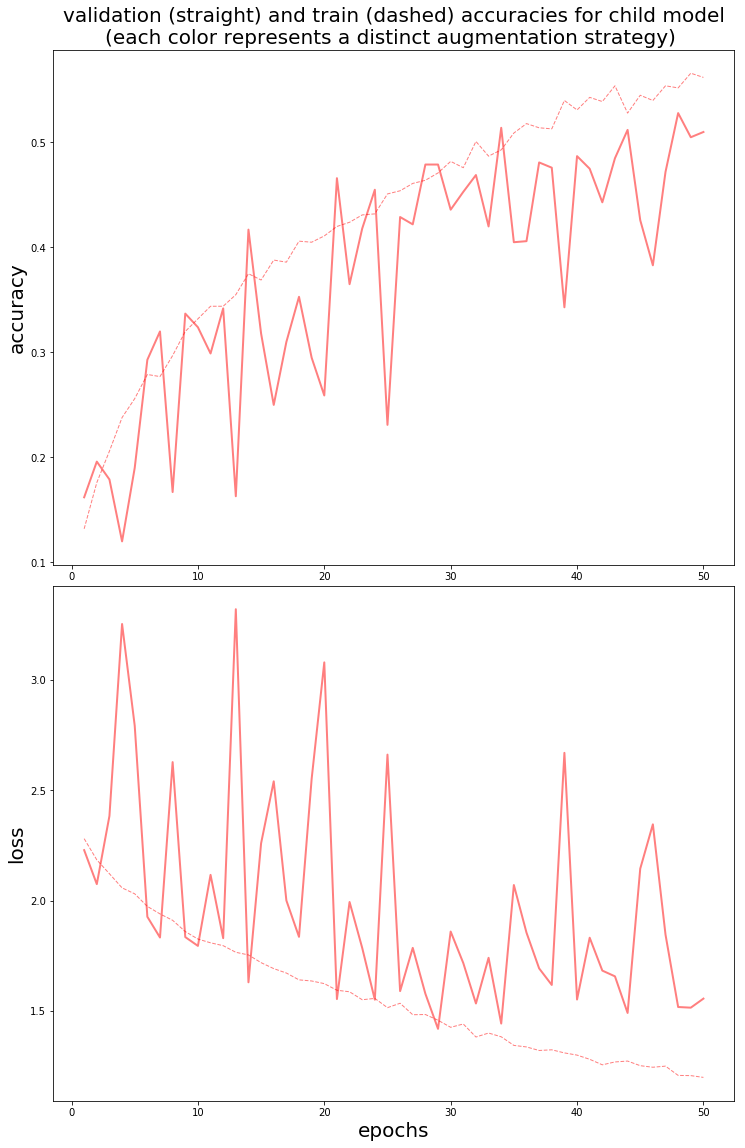

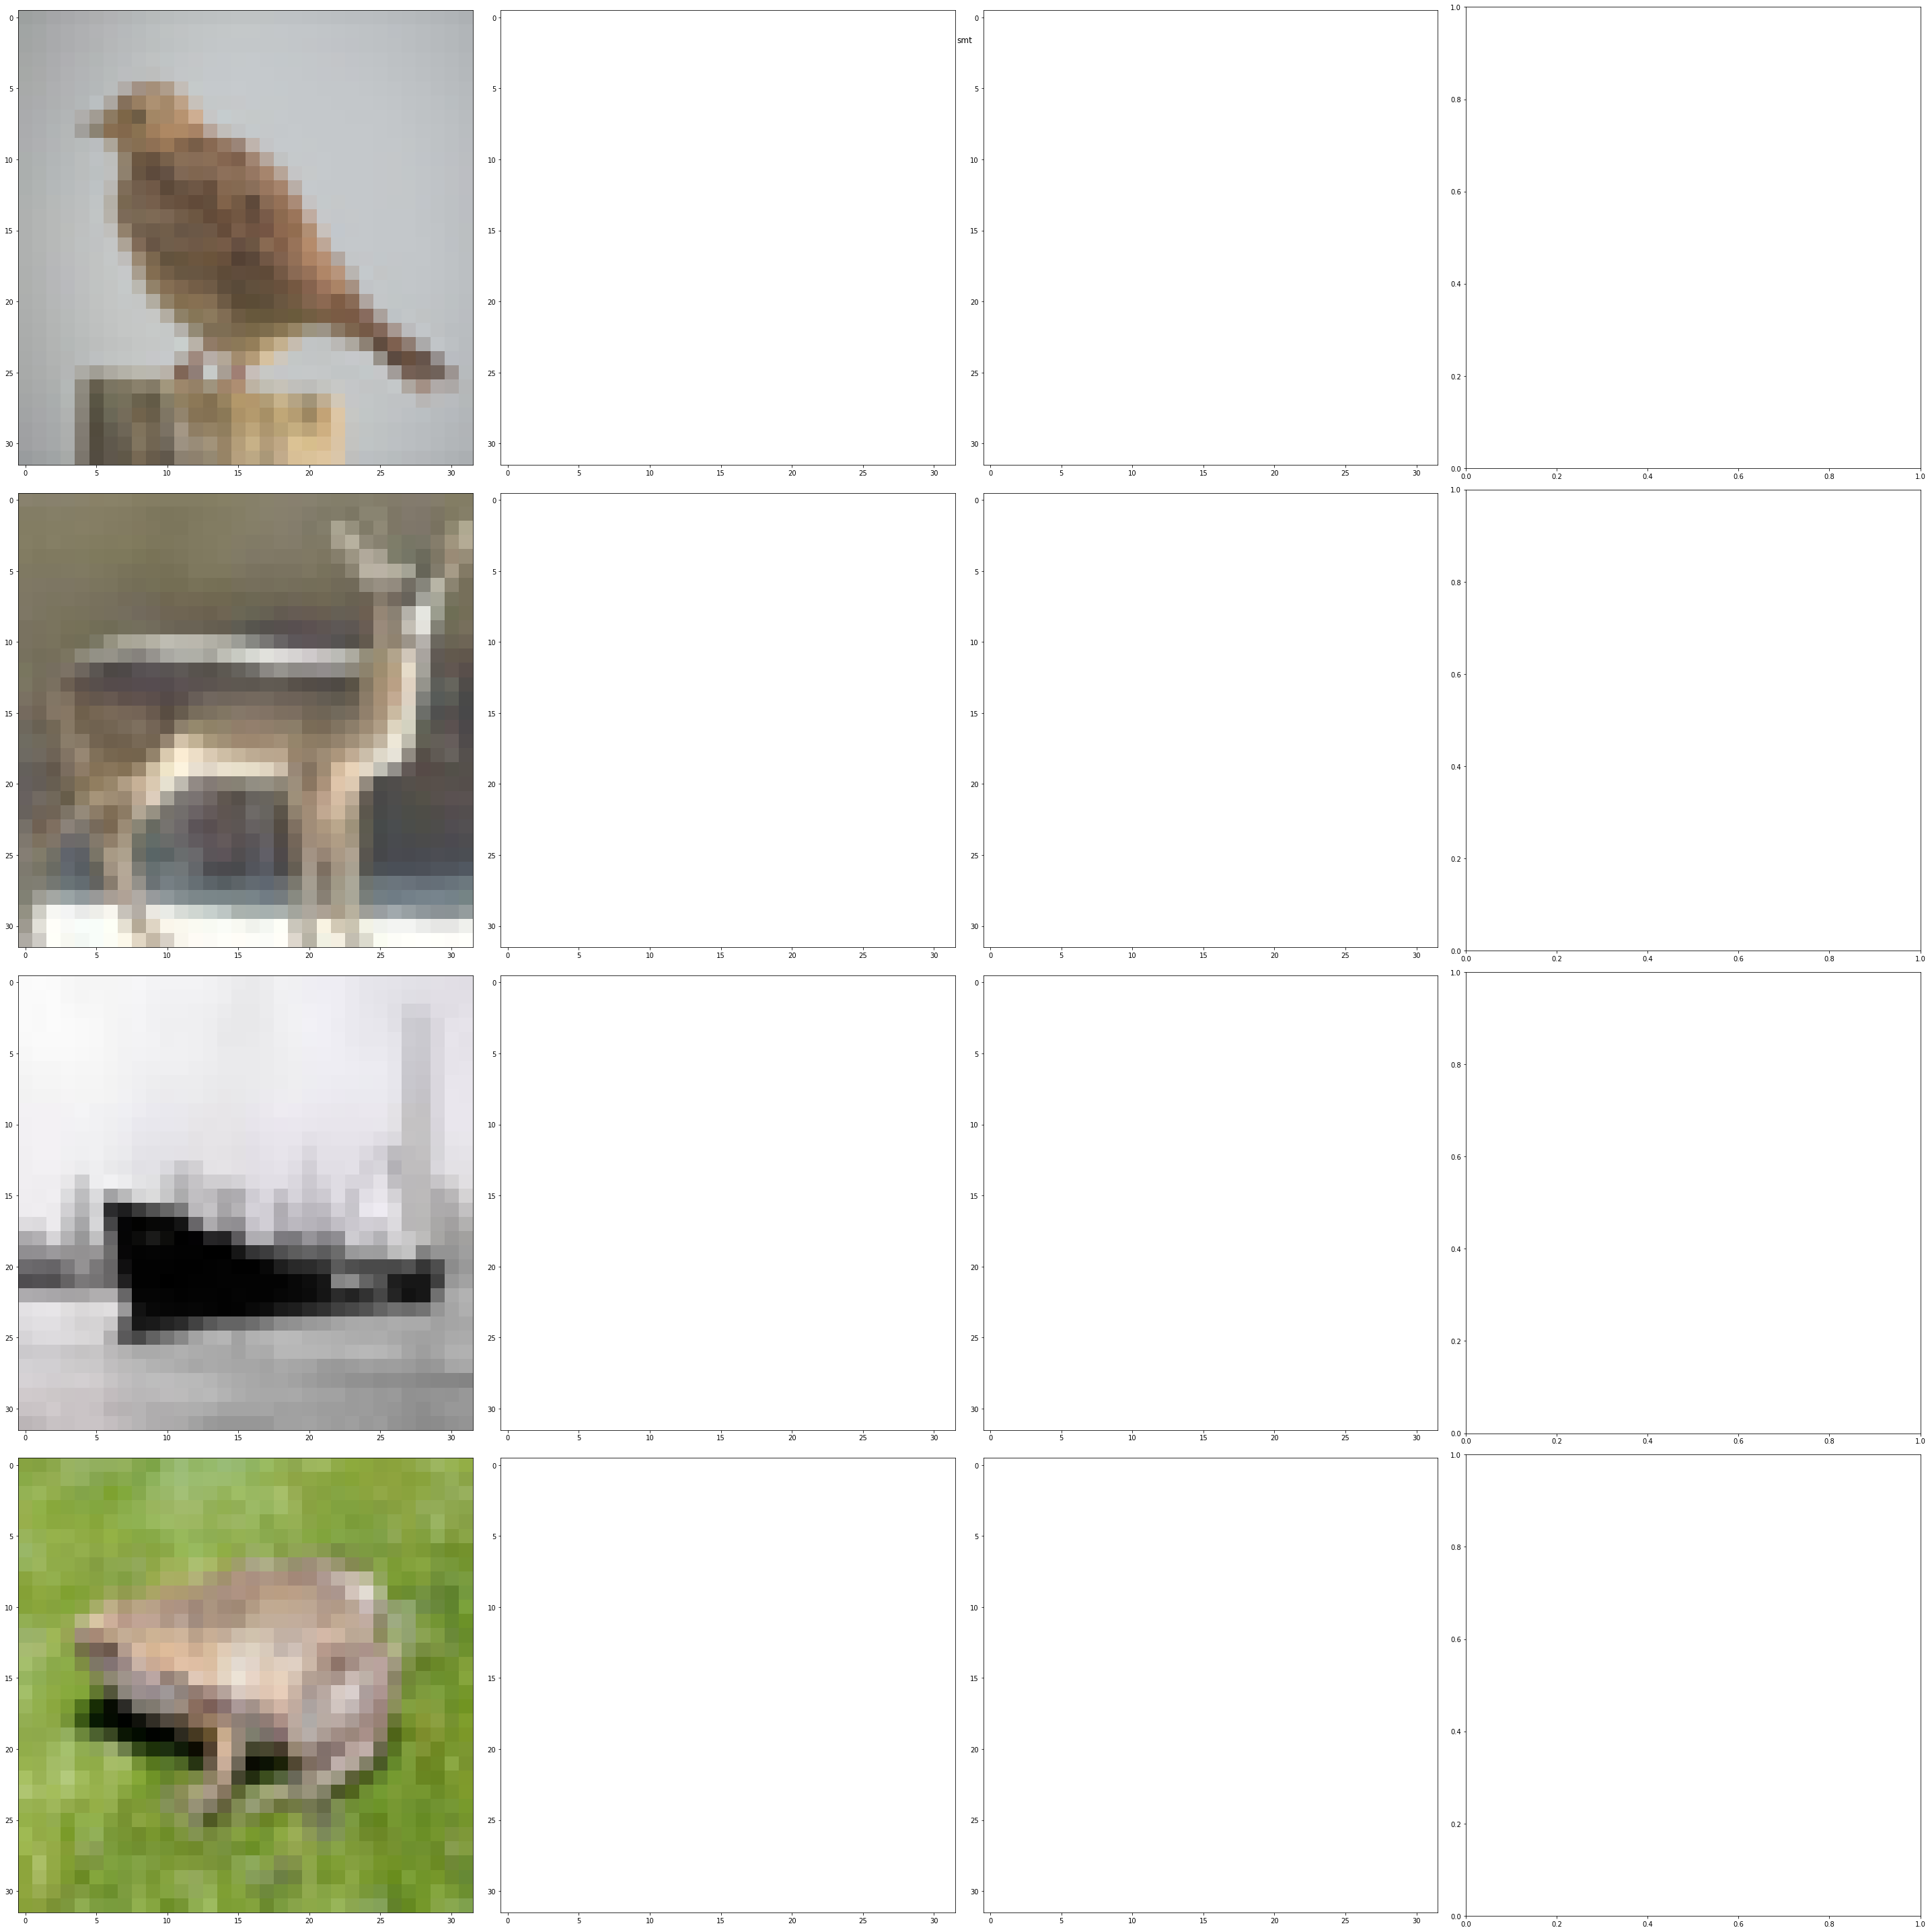

<Figure size 144x144 with 0 Axes>

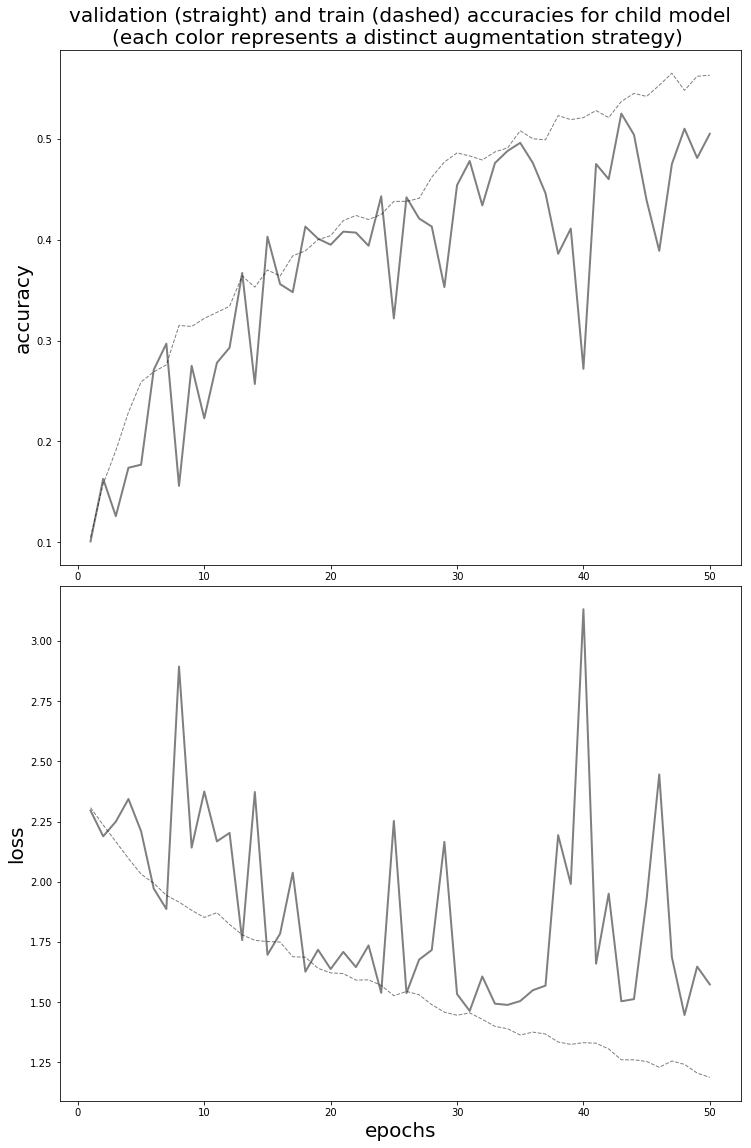

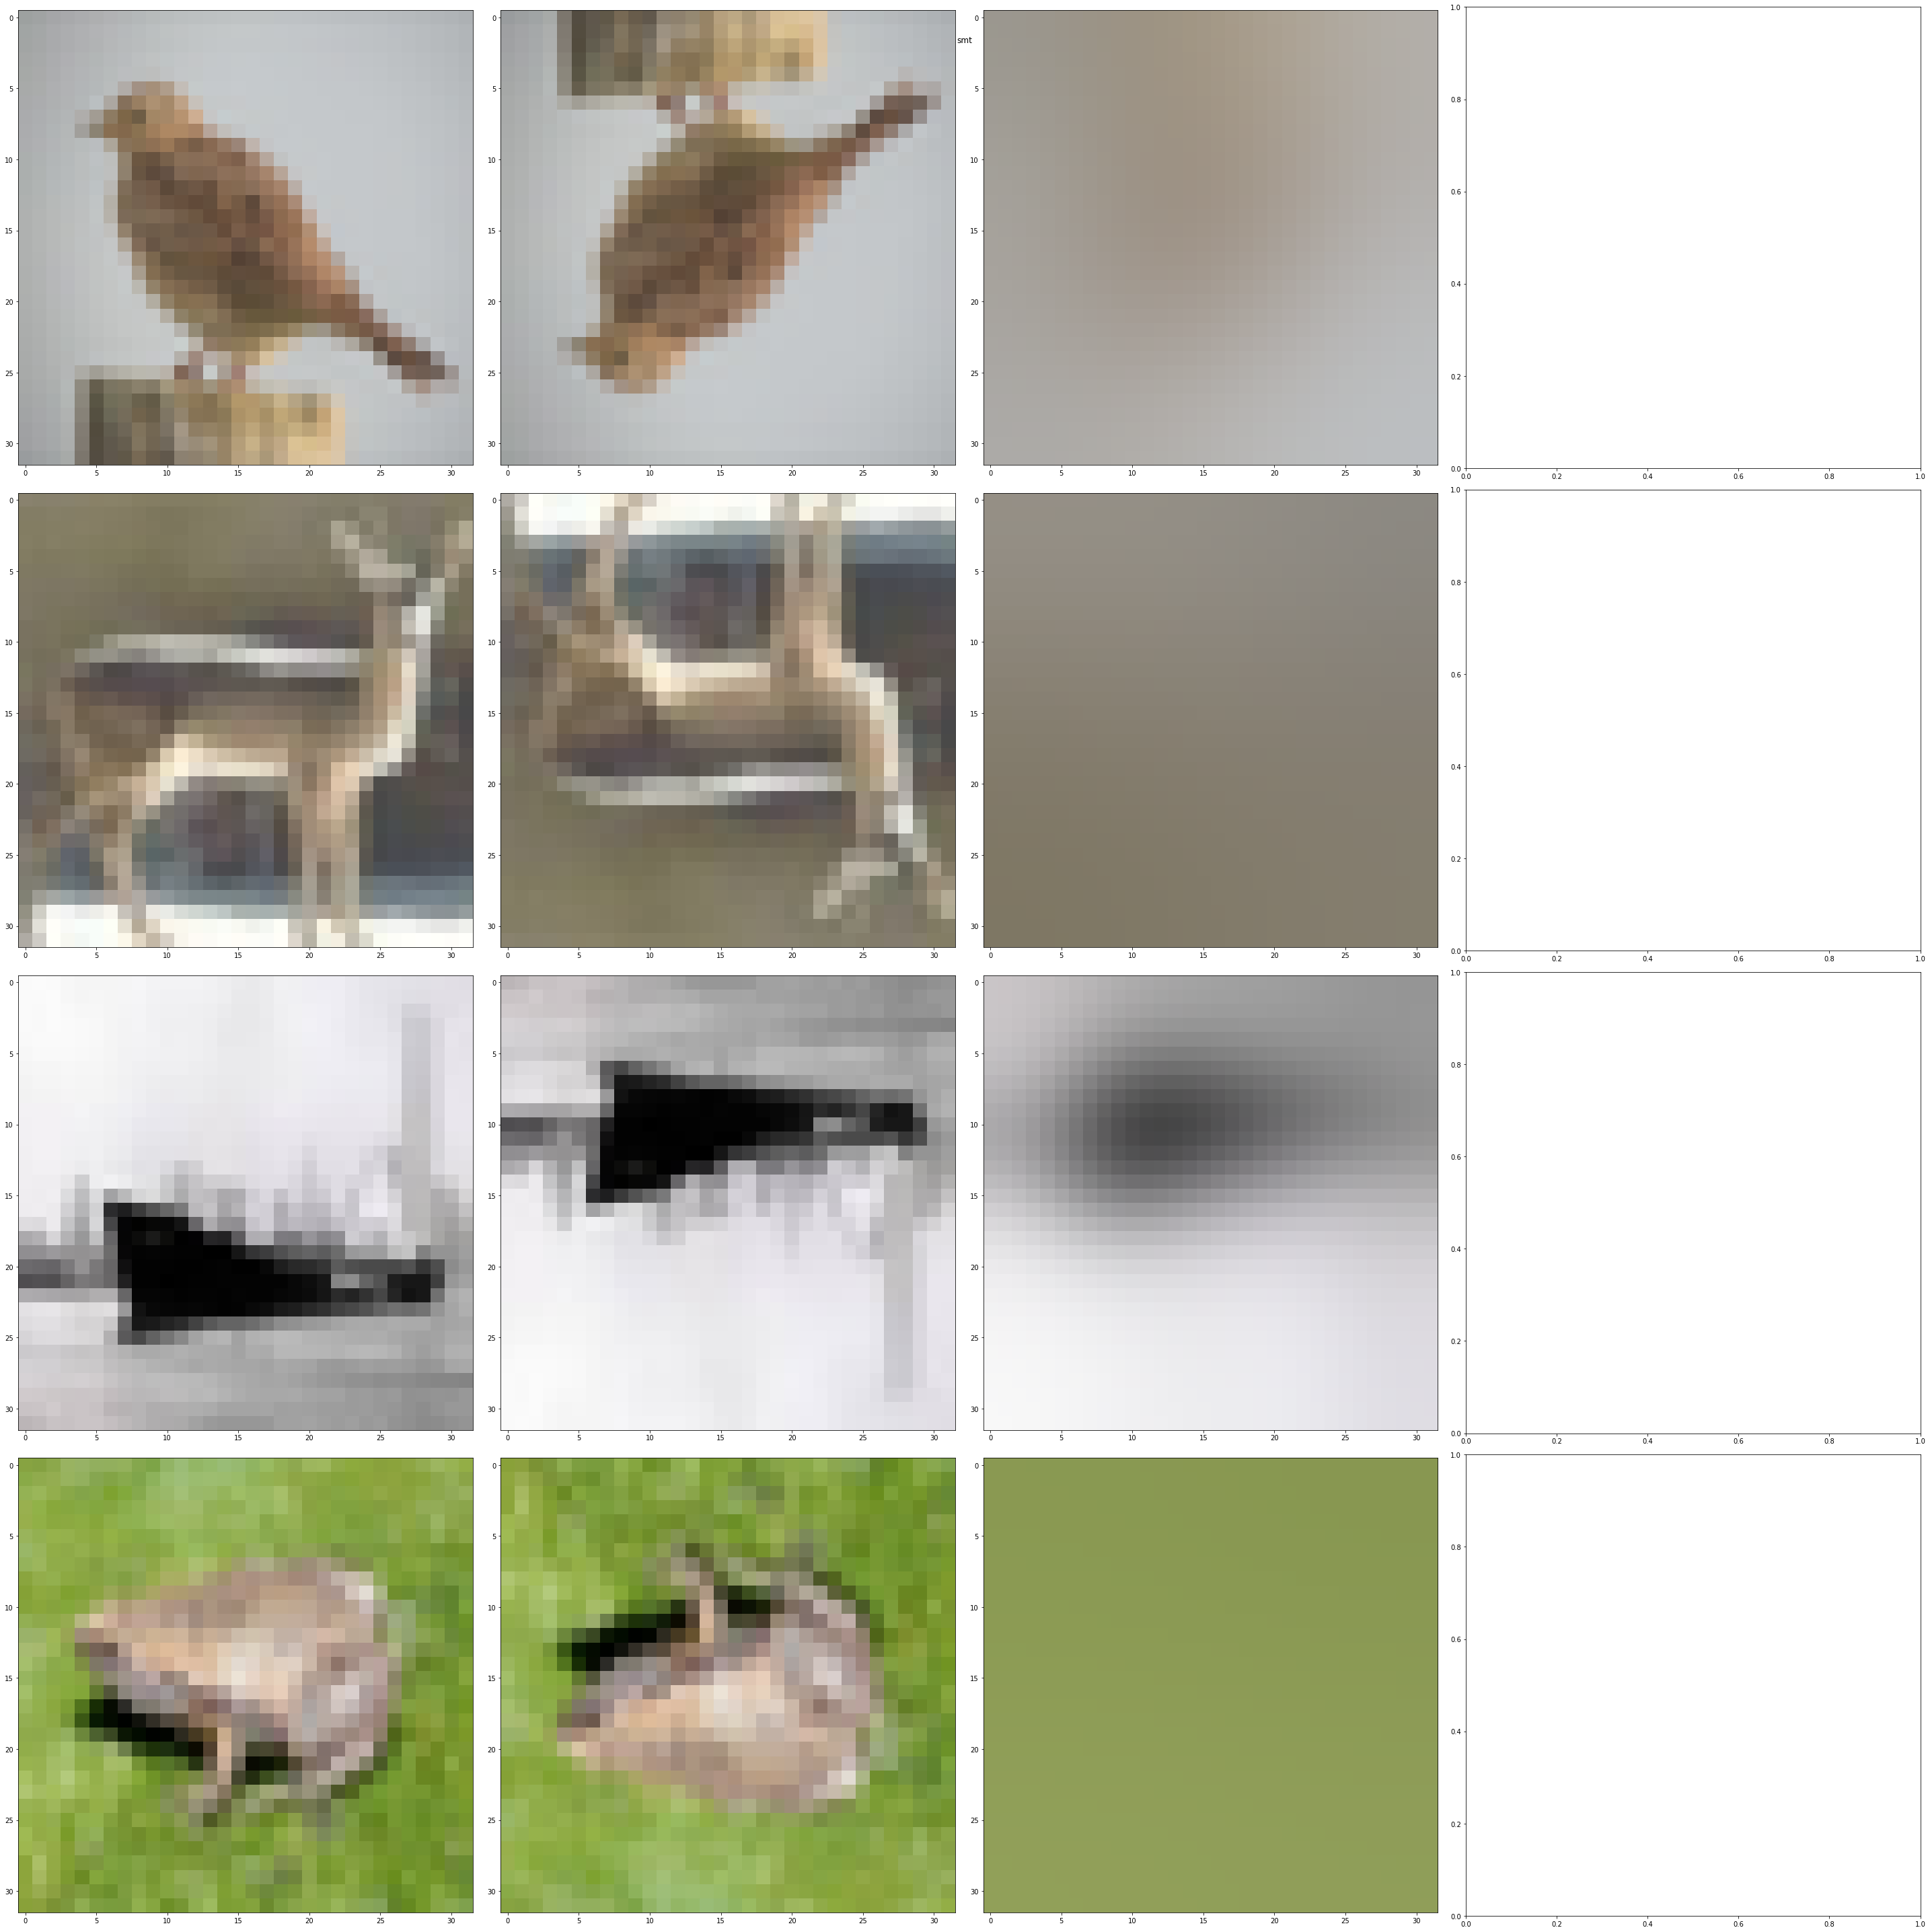

<Figure size 144x144 with 0 Axes>

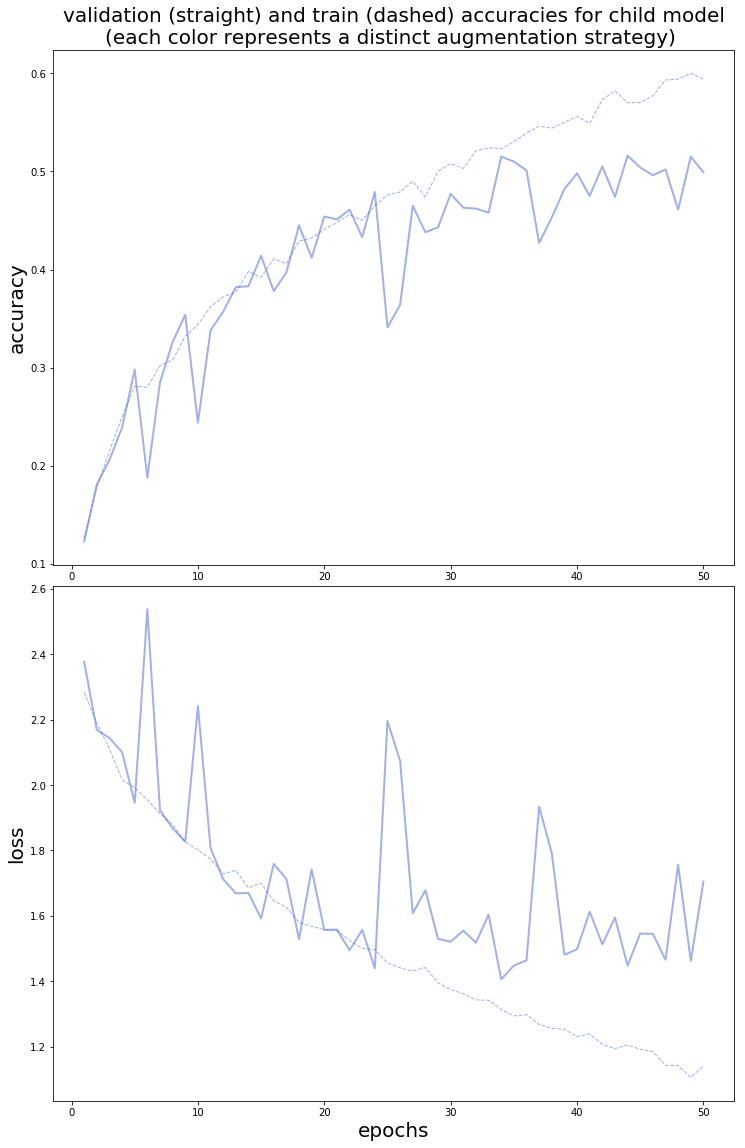

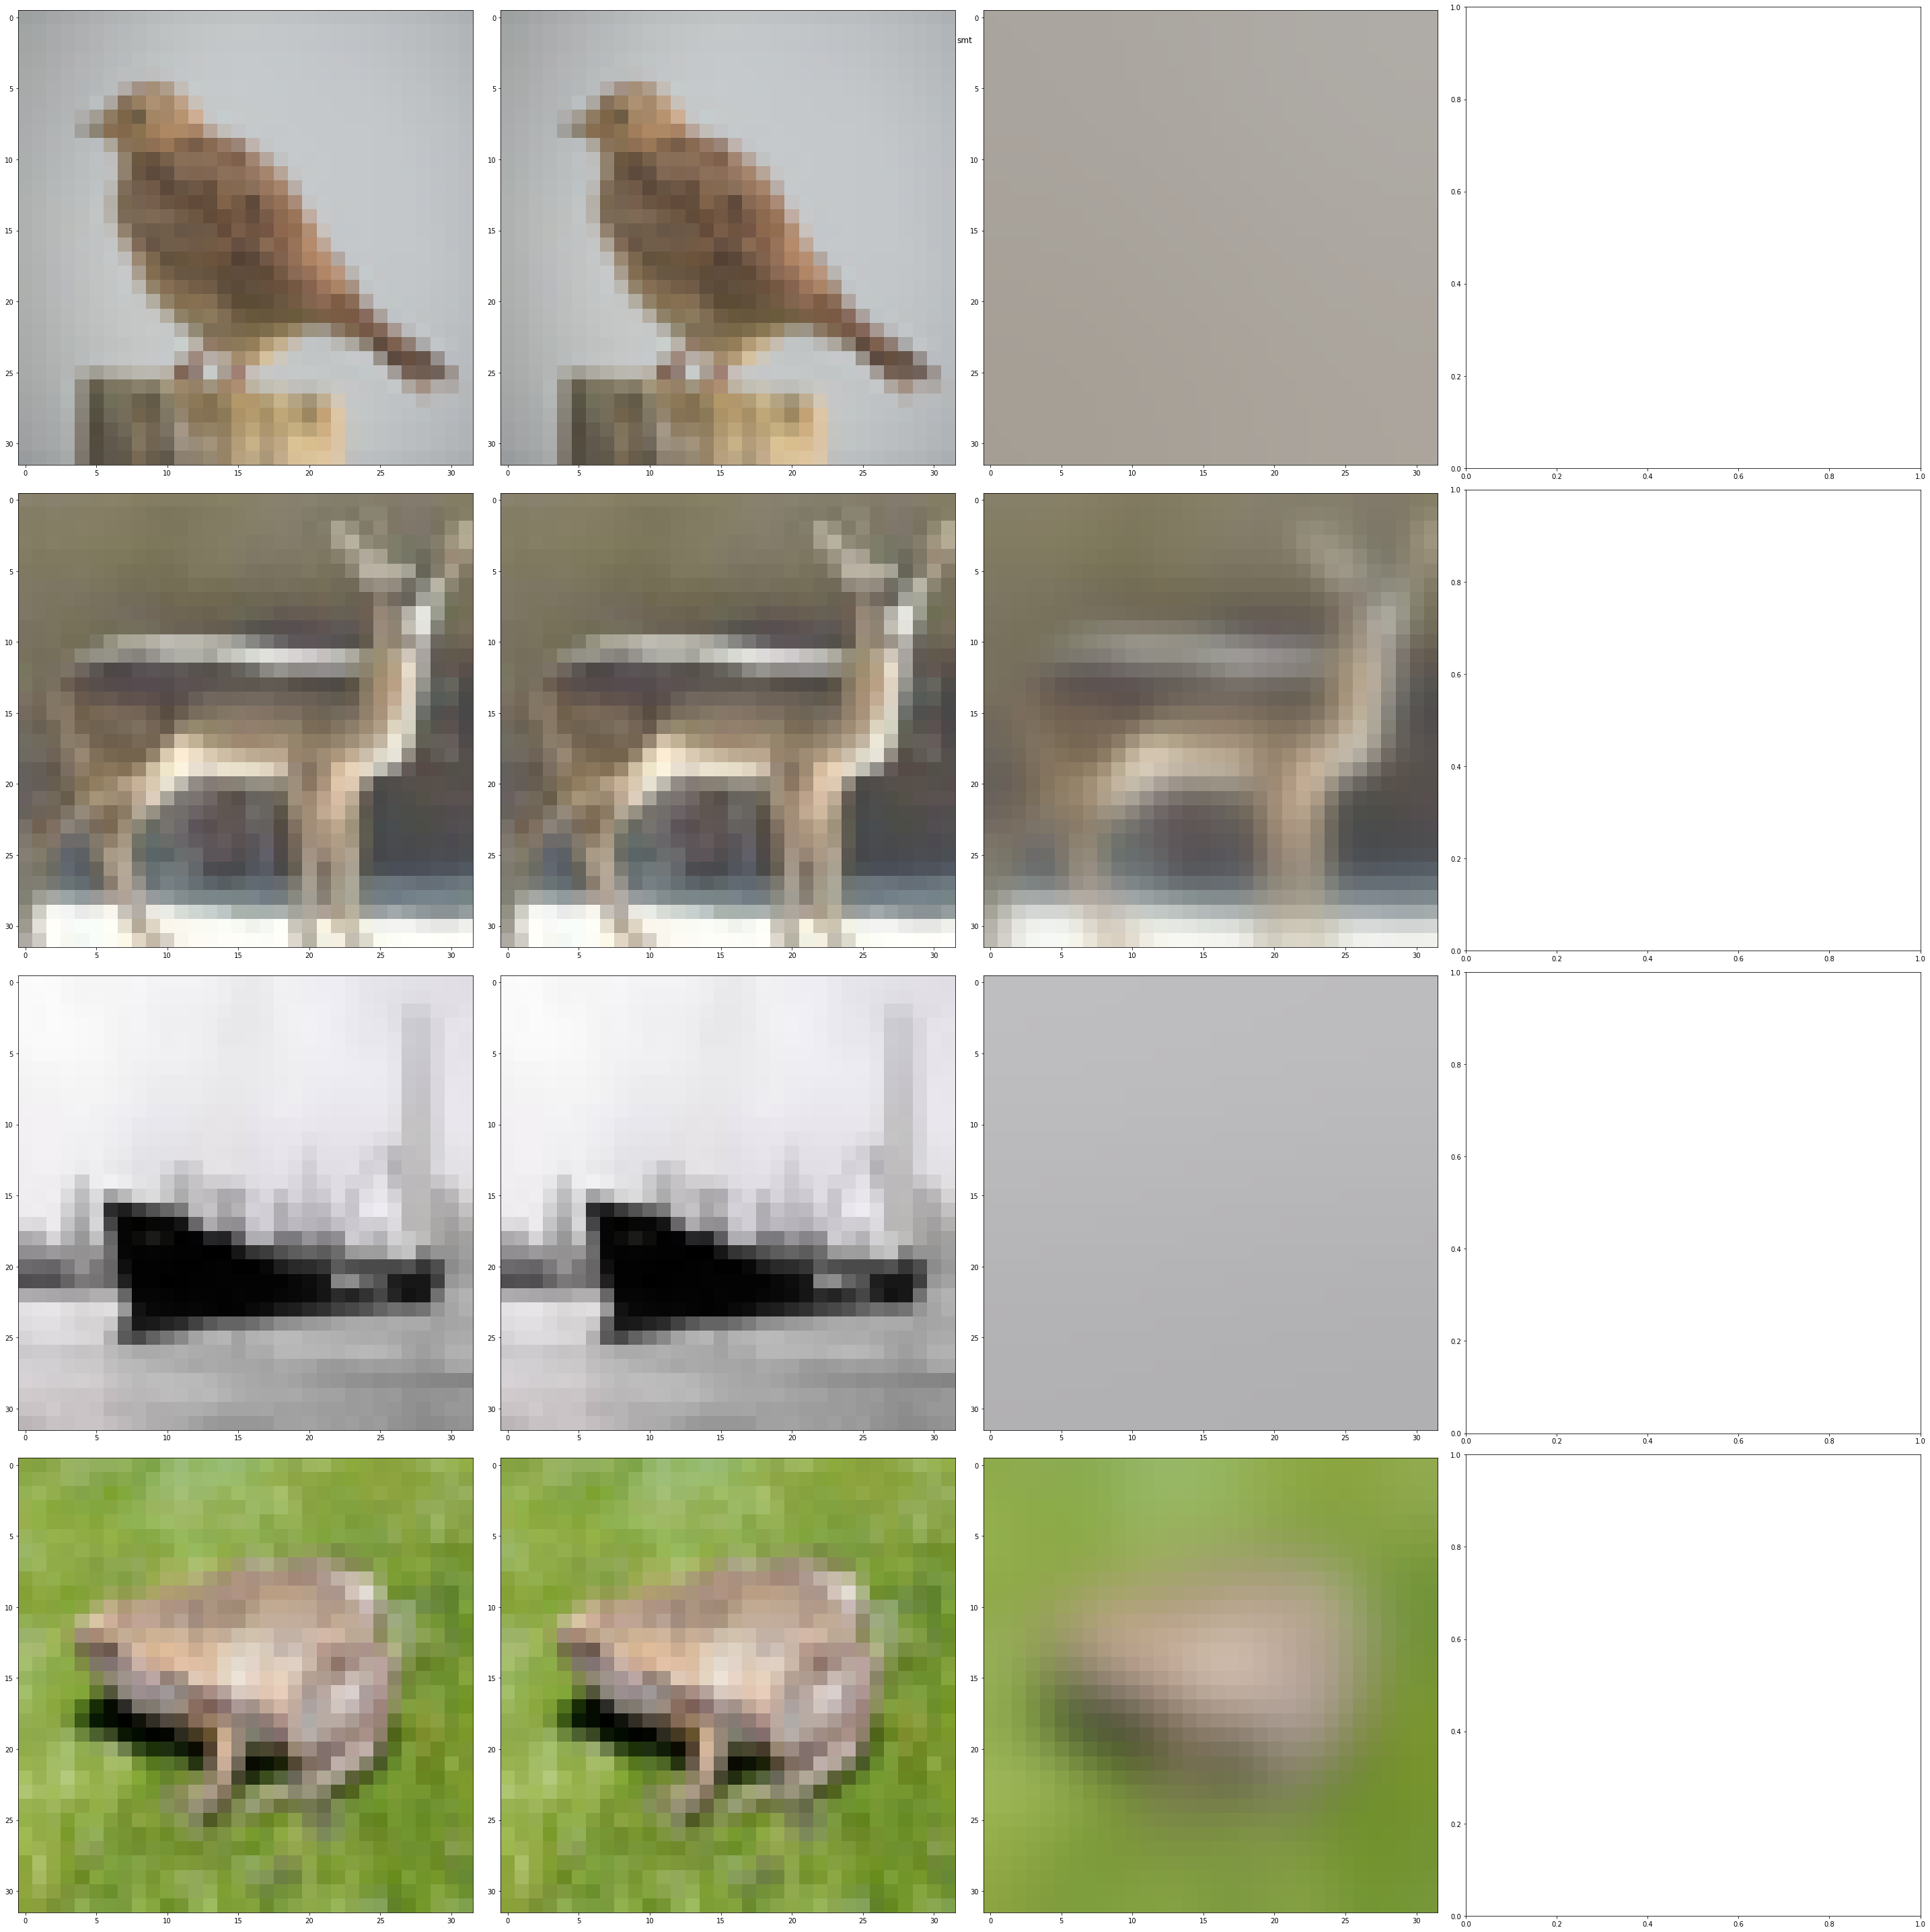

<Figure size 144x144 with 0 Axes>

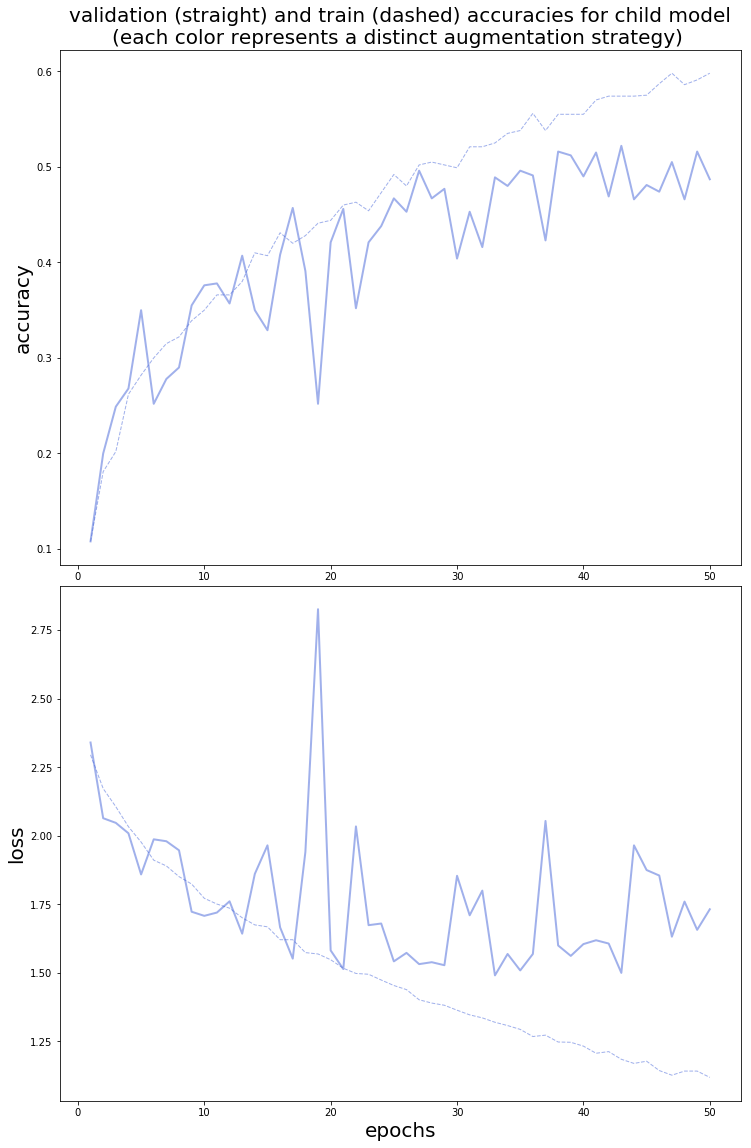

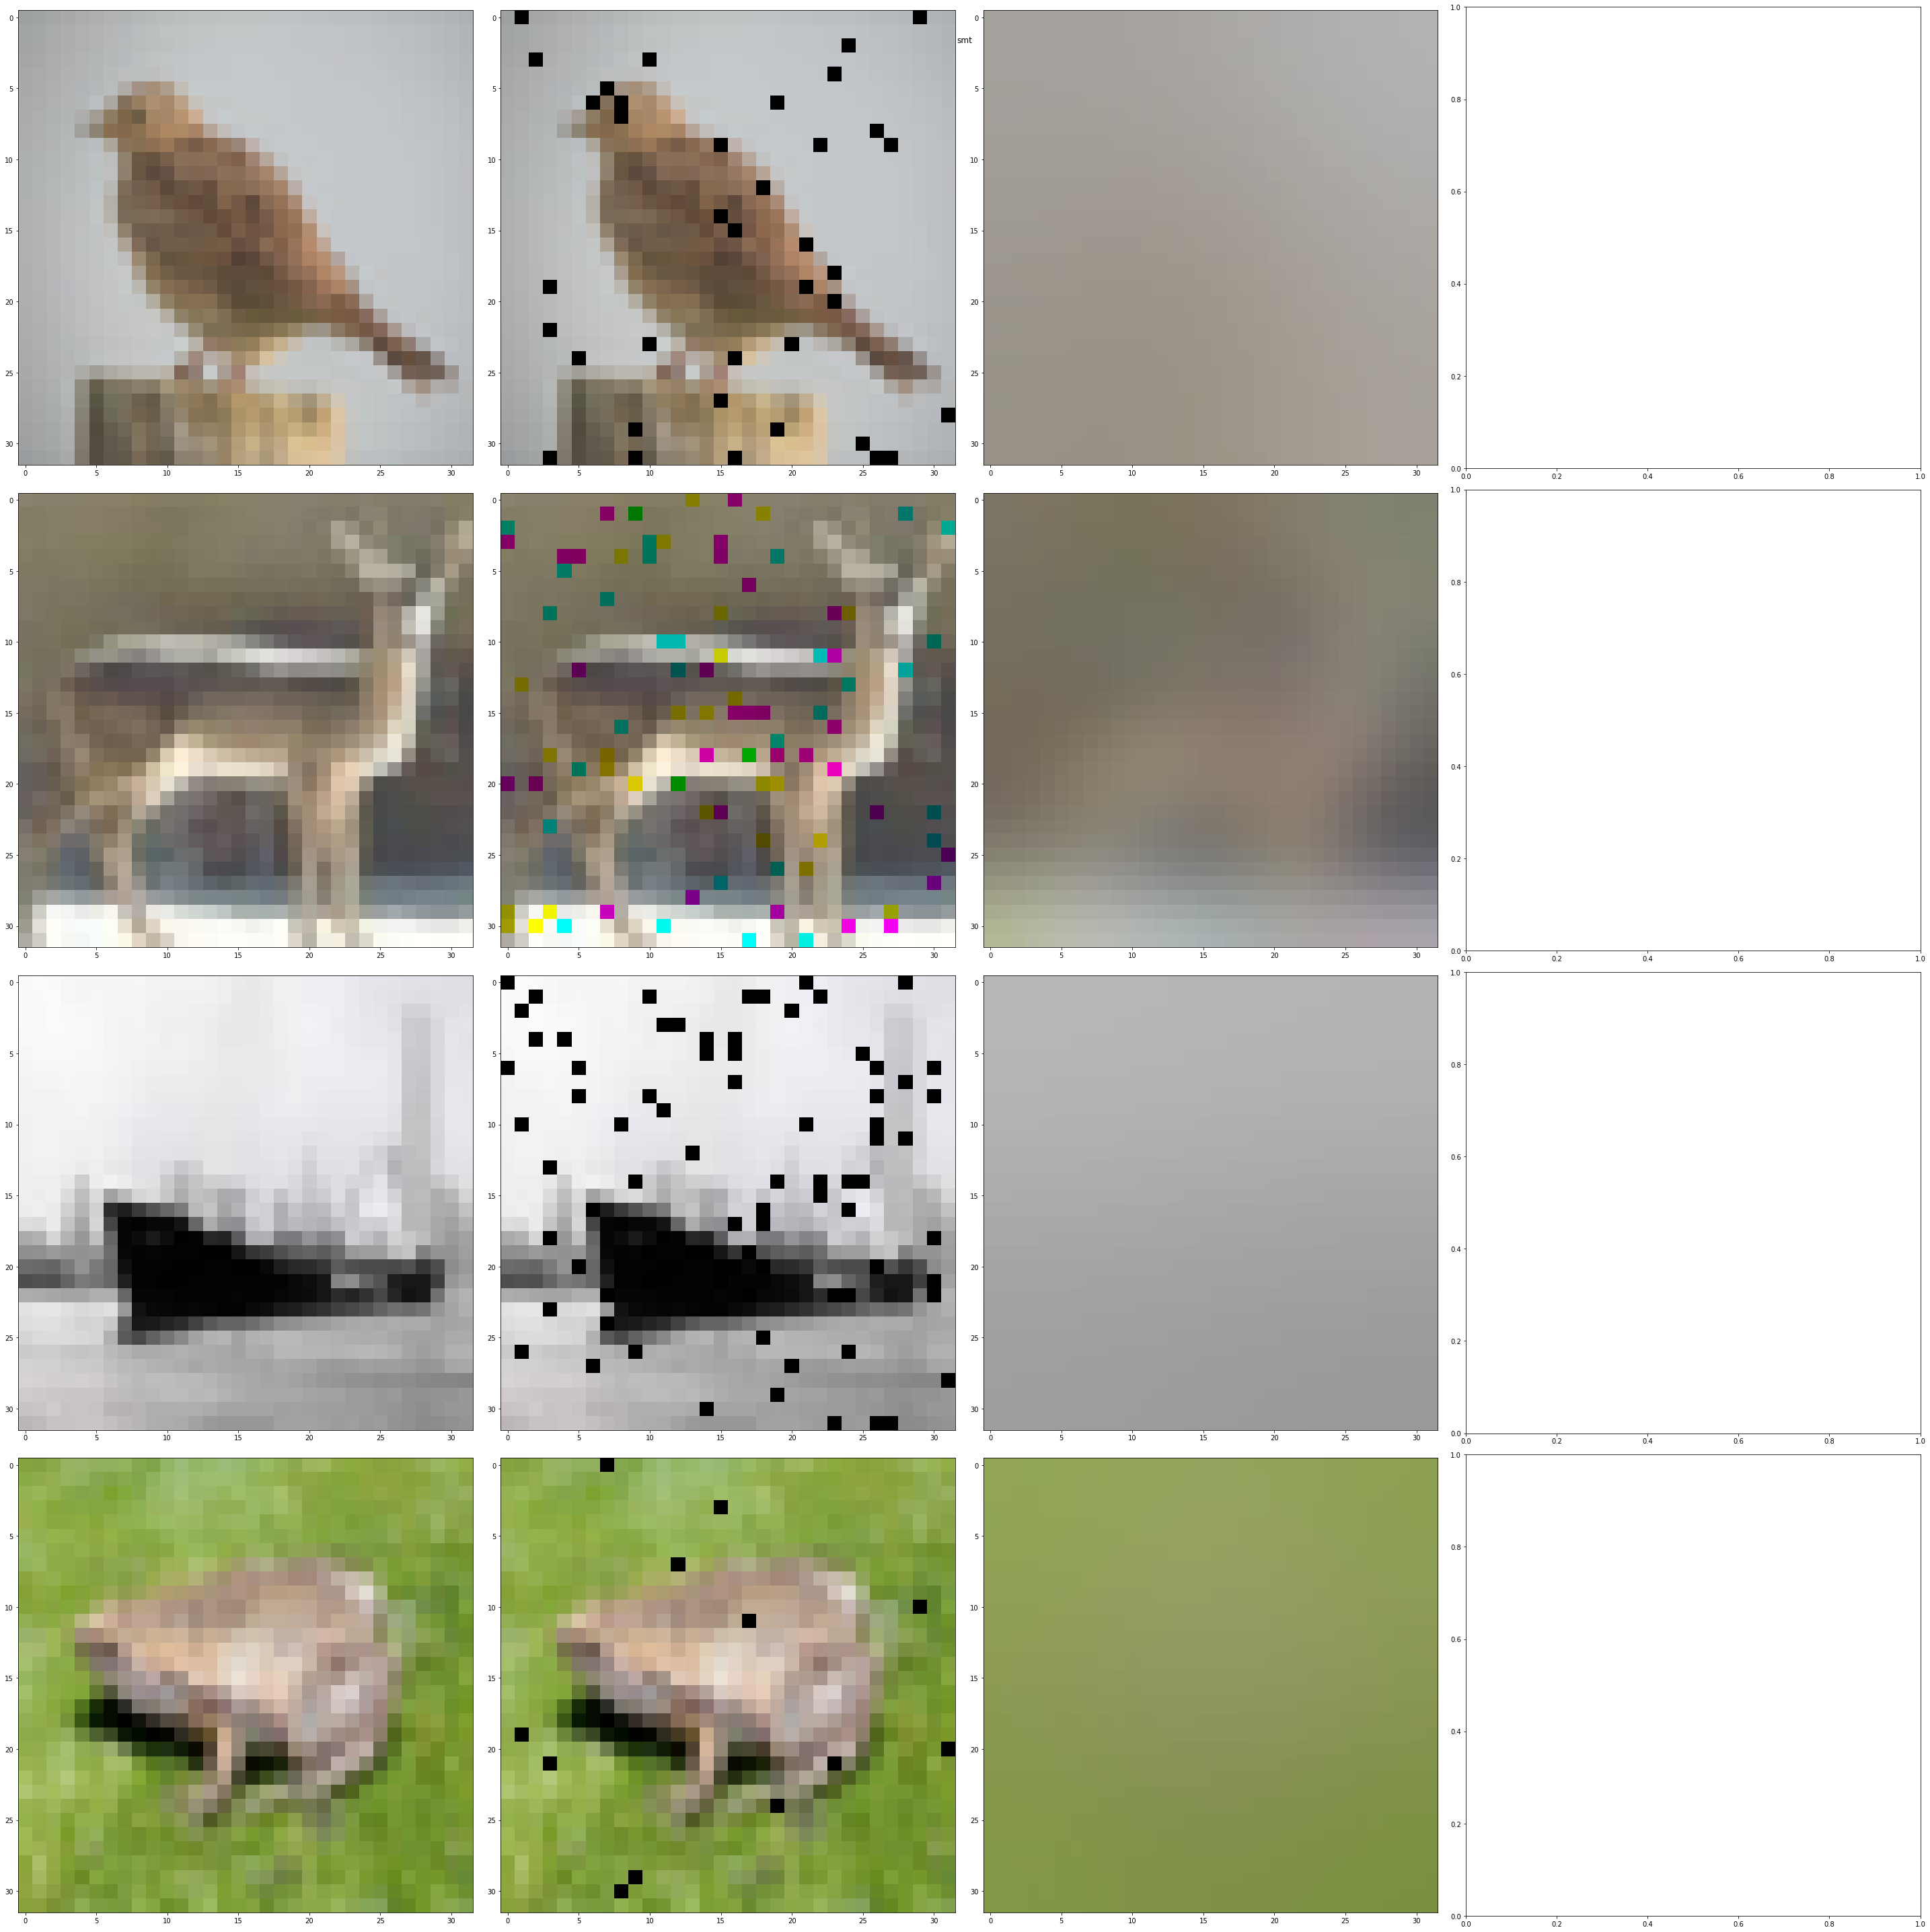

<Figure size 144x144 with 0 Axes>

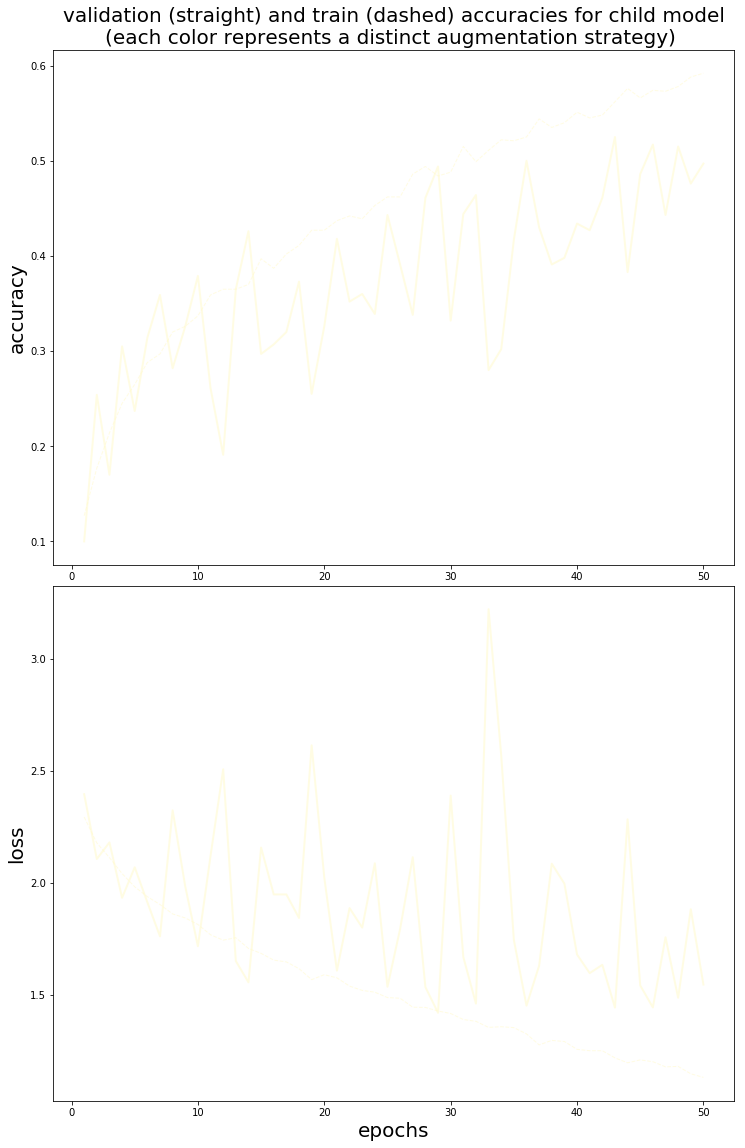

In [42]:
for i in non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward", ascending=False).trial_no.values[:5]:
    print ("trial_no:",i)
    display_augmentation_by_steps(i, non_overfitting_exp_df, data, nrows=4)
    # display_augmentation_by_trial_no(i, non_overfitting_exp_df, data, nrows=2, ncols=4)
    plt.figure(figsize=(2,2))
    plot_exp_lines(exp_df[exp_df["trial_no"]==i])

In [49]:
top20_df = (exp_df.drop_duplicates("trial_no")
    .sort_values("reward",ascending=False)
    .drop_duplicates(["aug1_type","aug2_type"]))[:20]

top20_df.to_csv("../../top20_policies_cifar10_exp_02_07.csv", index=False)


top20_df

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,reward,epoch,acc_overfit
9200,0.116,2.293,0.112,2.273,185,crop,0.057,gaussian-blur,0.811,0.407,1,0.570,0.0,0.004
7650,0.129,2.287,0.198,2.209,154,horizontal-flip,0.864,gaussian-blur,0.881,0.452,1,0.565,0.0,-0.069
9450,0.124,2.310,0.148,2.296,190,invert,0.220,gaussian-blur,0.804,0.420,1,0.560,0.0,-0.024
9950,0.120,2.293,0.097,2.410,200,coarse-salt-pepper,0.065,gaussian-blur,0.869,0.393,1,0.555,0.0,0.023
3950,0.106,2.312,0.165,2.257,80,add-to-hue-and-saturation,0.944,crop,0.149,0.491,1,0.555,0.0,-0.059
1050,0.126,2.290,0.231,2.201,22,shear,0.942,gaussian-blur,0.895,0.470,1,0.552,0.0,-0.105
3800,0.117,2.309,0.232,2.276,77,add-to-hue-and-saturation,0.941,add-to-hue-and-saturation,0.081,0.502,1,0.548,0.0,-0.115
9050,0.124,2.294,0.112,2.311,182,brighten,0.002,gaussian-blur,0.823,0.371,1,0.547,0.0,0.012
3150,0.121,2.307,0.186,2.277,64,add-to-hue-and-saturation,0.912,gaussian-blur,0.120,0.521,1,0.547,0.0,-0.065
5750,0.123,2.287,0.108,2.321,116,vertical-flip,0.841,gaussian-blur,0.901,0.564,1,0.547,0.0,0.015


# Top-3 nonoverfitting policies curves

In [ ]:
top3_non_overfitting = (non_overfitting_exp_df.drop_duplicates("trial_no")
                            .sort_values("reward",ascending=False)["trial_no"]
                            .values[:3]
                       )

plot_exp_lines(non_overfitting_exp_df[non_overfitting_exp_df["trial_no"].isin(top3_non_overfitting)])

In [ ]:
np.array_split(np.arange(8) , 20)

In [ ]:
rowList=[]
for x in range(len(exp_df["trial_no"].unique())):
    ind = x*50+49
    reward = exp_df.iloc[ind]["reward"]
    val_acc = exp_df.iloc[ind]["val_acc"]
    rowList.append([reward, val_acc])
rv_df = pd.DataFrame(rowList, columns=["reward","val_acc"])
rv_df.head()

In [ ]:
plt.scatter(rv_df["reward"],rv_df["val_acc"])